In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("//content//drive//MyDrive//Bacteria.csv")

In [3]:
df.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.540000e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.540000e-07,Streptococcus_pyogenes
1,1,-9.540000e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.540000e-07,Salmonella_enterica
2,2,-9.540000e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.050000e-06,Salmonella_enterica
3,3,4.630000e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000022,0.000016,0.000046,-9.540000e-07,Salmonella_enterica
4,4,-9.540000e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.540000e-07,Enterococcus_hirae


In [4]:
df.shape

(9998, 288)

In [5]:
df.describe()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,9998.000000,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,...,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9.998000e+03
mean,4999.498500,1.718542e-06,-0.000003,-0.000015,-0.000010,0.000008,0.000025,0.000018,-0.000008,-0.000029,...,0.000144,0.000326,0.000237,0.000459,0.000568,0.000367,0.000066,0.000083,0.000118,2.153164e-07
std,2886.320925,1.424840e-04,0.000106,0.000271,0.000432,0.000698,0.000829,0.000794,0.000454,0.000054,...,0.000767,0.001030,0.000838,0.001239,0.001474,0.001169,0.000501,0.000479,0.000716,2.014546e-05
min,0.000000,-9.540000e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.540000e-07
25%,2500.250000,-9.540000e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.540000e-07
50%,4999.500000,-9.540000e-07,-0.000010,-0.000043,-0.000114,-0.000198,-0.000233,-0.000196,-0.000114,-0.000043,...,0.000017,0.000060,0.000047,0.000124,0.000114,0.000040,-0.000010,0.000001,0.000001,-9.540000e-07
75%,7498.750000,-9.540000e-07,-0.000003,-0.000011,-0.000004,-0.000010,0.000004,-0.000027,0.000004,-0.000026,...,0.000116,0.000446,0.000297,0.000649,0.000763,0.000357,0.000030,0.000061,0.000071,-9.540000e-07
max,9998.000000,9.999046e-03,0.009990,0.009957,0.009886,0.009800,0.009760,0.019800,0.009886,0.001957,...,0.009957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,0.009990,0.019990,9.990460e-04


In [6]:
df['target'].unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

10 types of bacteria found here

In [7]:
df.corr()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,1.000000,0.008700,-0.008681,-0.012776,0.026498,0.007822,0.006476,0.020478,0.012715,0.017696,...,0.006221,-0.001910,0.007468,-0.019842,-0.011740,0.003469,-0.011521,0.002226,-0.002594,0.014632
A0T0G0C10,0.008700,1.000000,-0.000937,-0.001664,-0.003884,-0.002838,-0.001825,-0.003633,0.000831,-0.003751,...,-0.003472,0.062694,-0.004763,-0.006014,-0.005836,-0.004388,0.000795,-0.000945,-0.002501,-0.000986
A0T0G1C9,-0.008681,-0.000937,1.000000,0.000555,0.004412,0.004342,0.001017,0.008479,0.016725,0.001326,...,-0.000504,-0.007522,-0.006651,-0.010904,-0.003121,-0.009490,-0.005614,-0.006143,-0.004392,-0.001846
A0T0G2C8,-0.012776,-0.001664,0.000555,1.000000,0.015928,0.022248,0.025287,0.019506,0.016908,0.018742,...,-0.015612,-0.024382,-0.020648,-0.028418,-0.028123,-0.020594,-0.008853,-0.011913,-0.011813,-0.003470
A0T0G3C7,0.026498,-0.003884,0.004412,0.015928,1.000000,0.111145,0.211144,0.102089,0.078474,0.100125,...,-0.035527,-0.051958,-0.049084,-0.060891,-0.067353,-0.053625,-0.023669,-0.032563,0.004895,-0.008906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A8T2G0C0,0.003469,-0.004388,-0.009490,-0.020594,-0.053625,-0.071644,-0.063890,-0.036823,0.002915,-0.048283,...,0.044011,0.084754,0.051816,0.089399,0.191354,1.000000,0.066192,0.057489,0.083989,0.006307
A9T0G0C1,-0.011521,0.000795,-0.005614,-0.008853,-0.023669,-0.031752,-0.031494,-0.029619,-0.026214,-0.024257,...,0.115828,0.037063,0.013246,0.034427,0.034854,0.066192,1.000000,0.136772,0.008549,0.000104
A9T0G1C0,0.002226,-0.000945,-0.006143,-0.011913,-0.032563,-0.038690,-0.044983,-0.040184,-0.028413,-0.019237,...,0.020951,0.050349,0.053785,0.082429,0.041785,0.057489,0.136772,1.000000,0.012883,0.033698
A9T1G0C0,-0.002594,-0.002501,-0.004392,-0.011813,0.004895,-0.036966,-0.039161,-0.000710,-0.027987,-0.026911,...,0.042864,0.040393,0.036281,0.083573,0.142718,0.083989,0.008549,0.012883,1.000000,-0.001200


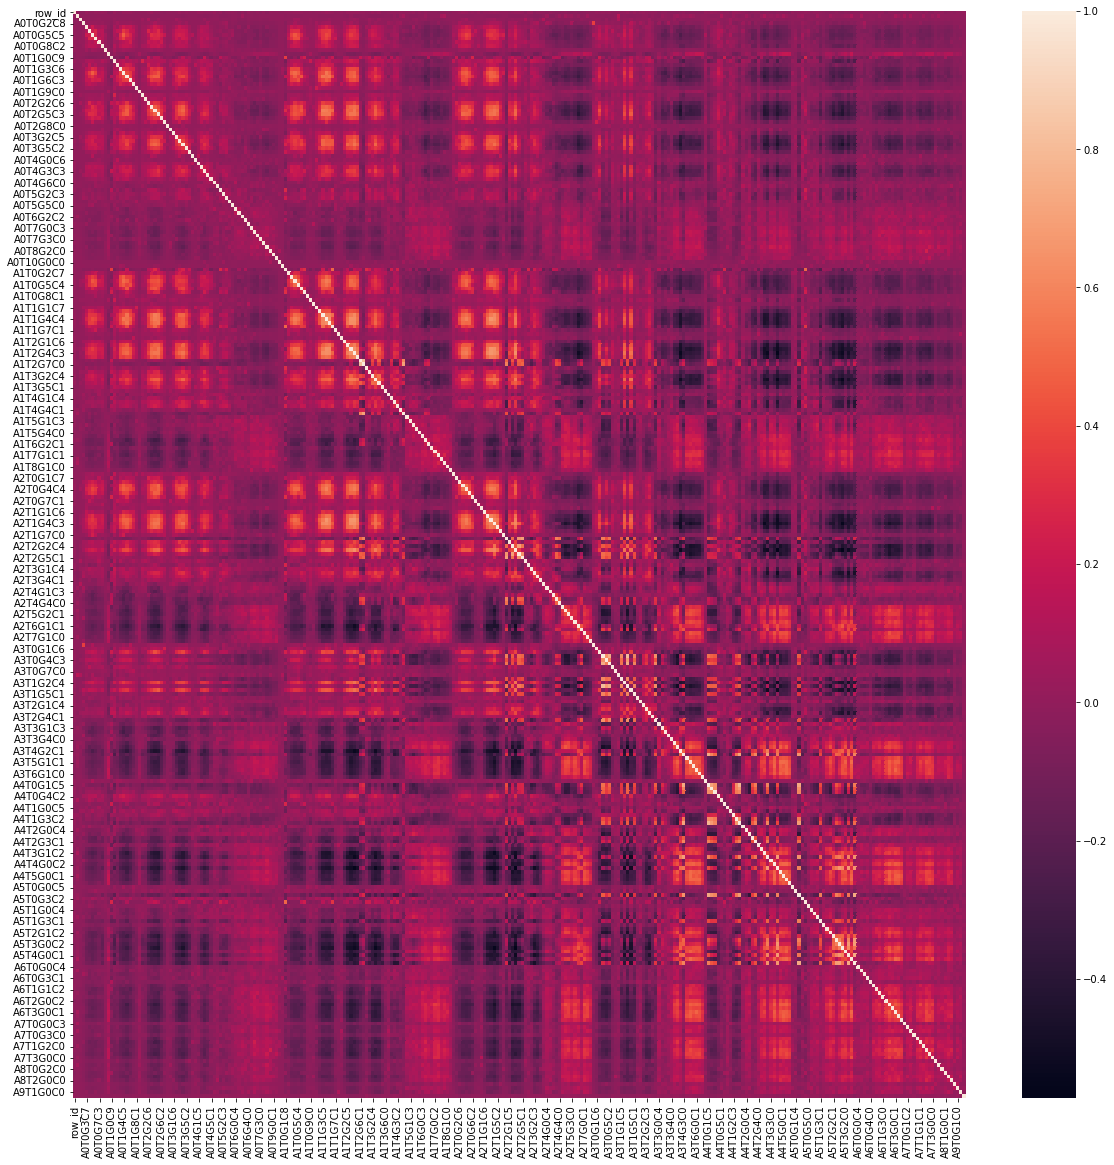

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [9]:
df.isnull().sum()

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
            ..
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
target       0
Length: 288, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 22.0+ MB


We can reduce the memory if we want

In [11]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [12]:
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype     
        if col_type != object and str(col_type)[:3]!='int':
            c_min = df[col].min()
            c_max = df[col].max() 
            if str(col_type)[:5] == 'float':  
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    return df

In [13]:
df=reduce_mem_usage(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Columns: 288 entries, row_id to target
dtypes: category(2), float16(286)
memory usage: 5.8 MB


First the size of the dataset was 22+MB now it is 5.8MB

In [15]:
df.columns

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0', 'A9T0G0C1',
       'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0', 'target'],
      dtype='object', length=288)

CHECKING FOR DUPLICATES

In [16]:
df.duplicated().sum()

0

We have to eliminate row id from the dataset first.

In [17]:
del df['row_id']

In [18]:
df

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000885,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.072884e-06,Salmonella_enterica
3,5.960464e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000022,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-9.536743e-07,0.000010,0.000017,0.000006,-0.000020,0.000030,-0.000030,0.000016,-0.000043,-0.000010,...,0.000104,0.000177,0.000174,0.000224,0.000047,-0.000010,0.000040,0.000021,-9.536743e-07,Bacteroides_fragilis
9994,-9.536743e-07,-0.000010,-0.000043,0.001885,0.001800,0.000760,0.001800,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.001914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
9995,-9.536743e-07,-0.000007,-0.000028,-0.000074,-0.000122,-0.000158,-0.000126,-0.000077,-0.000027,-0.000009,...,0.000535,0.000340,0.000540,0.000630,0.000380,0.000082,0.000106,0.000090,5.960464e-08,Streptococcus_pyogenes
9996,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,0.002914,-0.000043,-0.000086,-0.000086,0.000957,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes


In [19]:
df.shape

(9998, 287)

The no of entries is 9998 before deleting

In [20]:
df.duplicated().sum()

456

So there are around 456 entries which are containing duplicate entries. Now let's drop them

In [21]:
df=df.drop_duplicates()

In [22]:
df.shape

(9542, 287)

After deleting we have 9542 entries

Now checking for outliers

In [23]:
colNames=df.columns.to_list()

In [24]:
def show_boxplot(df):
  fig = plt.figure(figsize=(26, 50))
  rows, cols = 15, 3 
  idx=1
  colList=colNames[:45]

  for col in colList:
     ax = fig.add_subplot(rows, cols, idx)
     sns.boxplot(df[col])

     idx=idx+1


  fig.show()  

In [25]:
def DistPlotDraw(df):
  fig = plt.figure(figsize=(25, 50))
  rows, cols = 11, 4 
  idx=1
  colList=colNames[:44]

  for col in colList:
    ax = fig.add_subplot(rows, cols, idx)
    sns.distplot(df[col])

    idx=idx+1


  fig.show()    


In [26]:
def Histograms(df):
  fig = plt.figure(figsize=(25, 50))
  rows, cols = 8, 4 
  idx=1
  colList=colNames[:25]
  for col in colList:
    ax = fig.add_subplot(rows, cols, idx)
    sns.histplot(df[col])

    idx=idx+1

    fig.show()


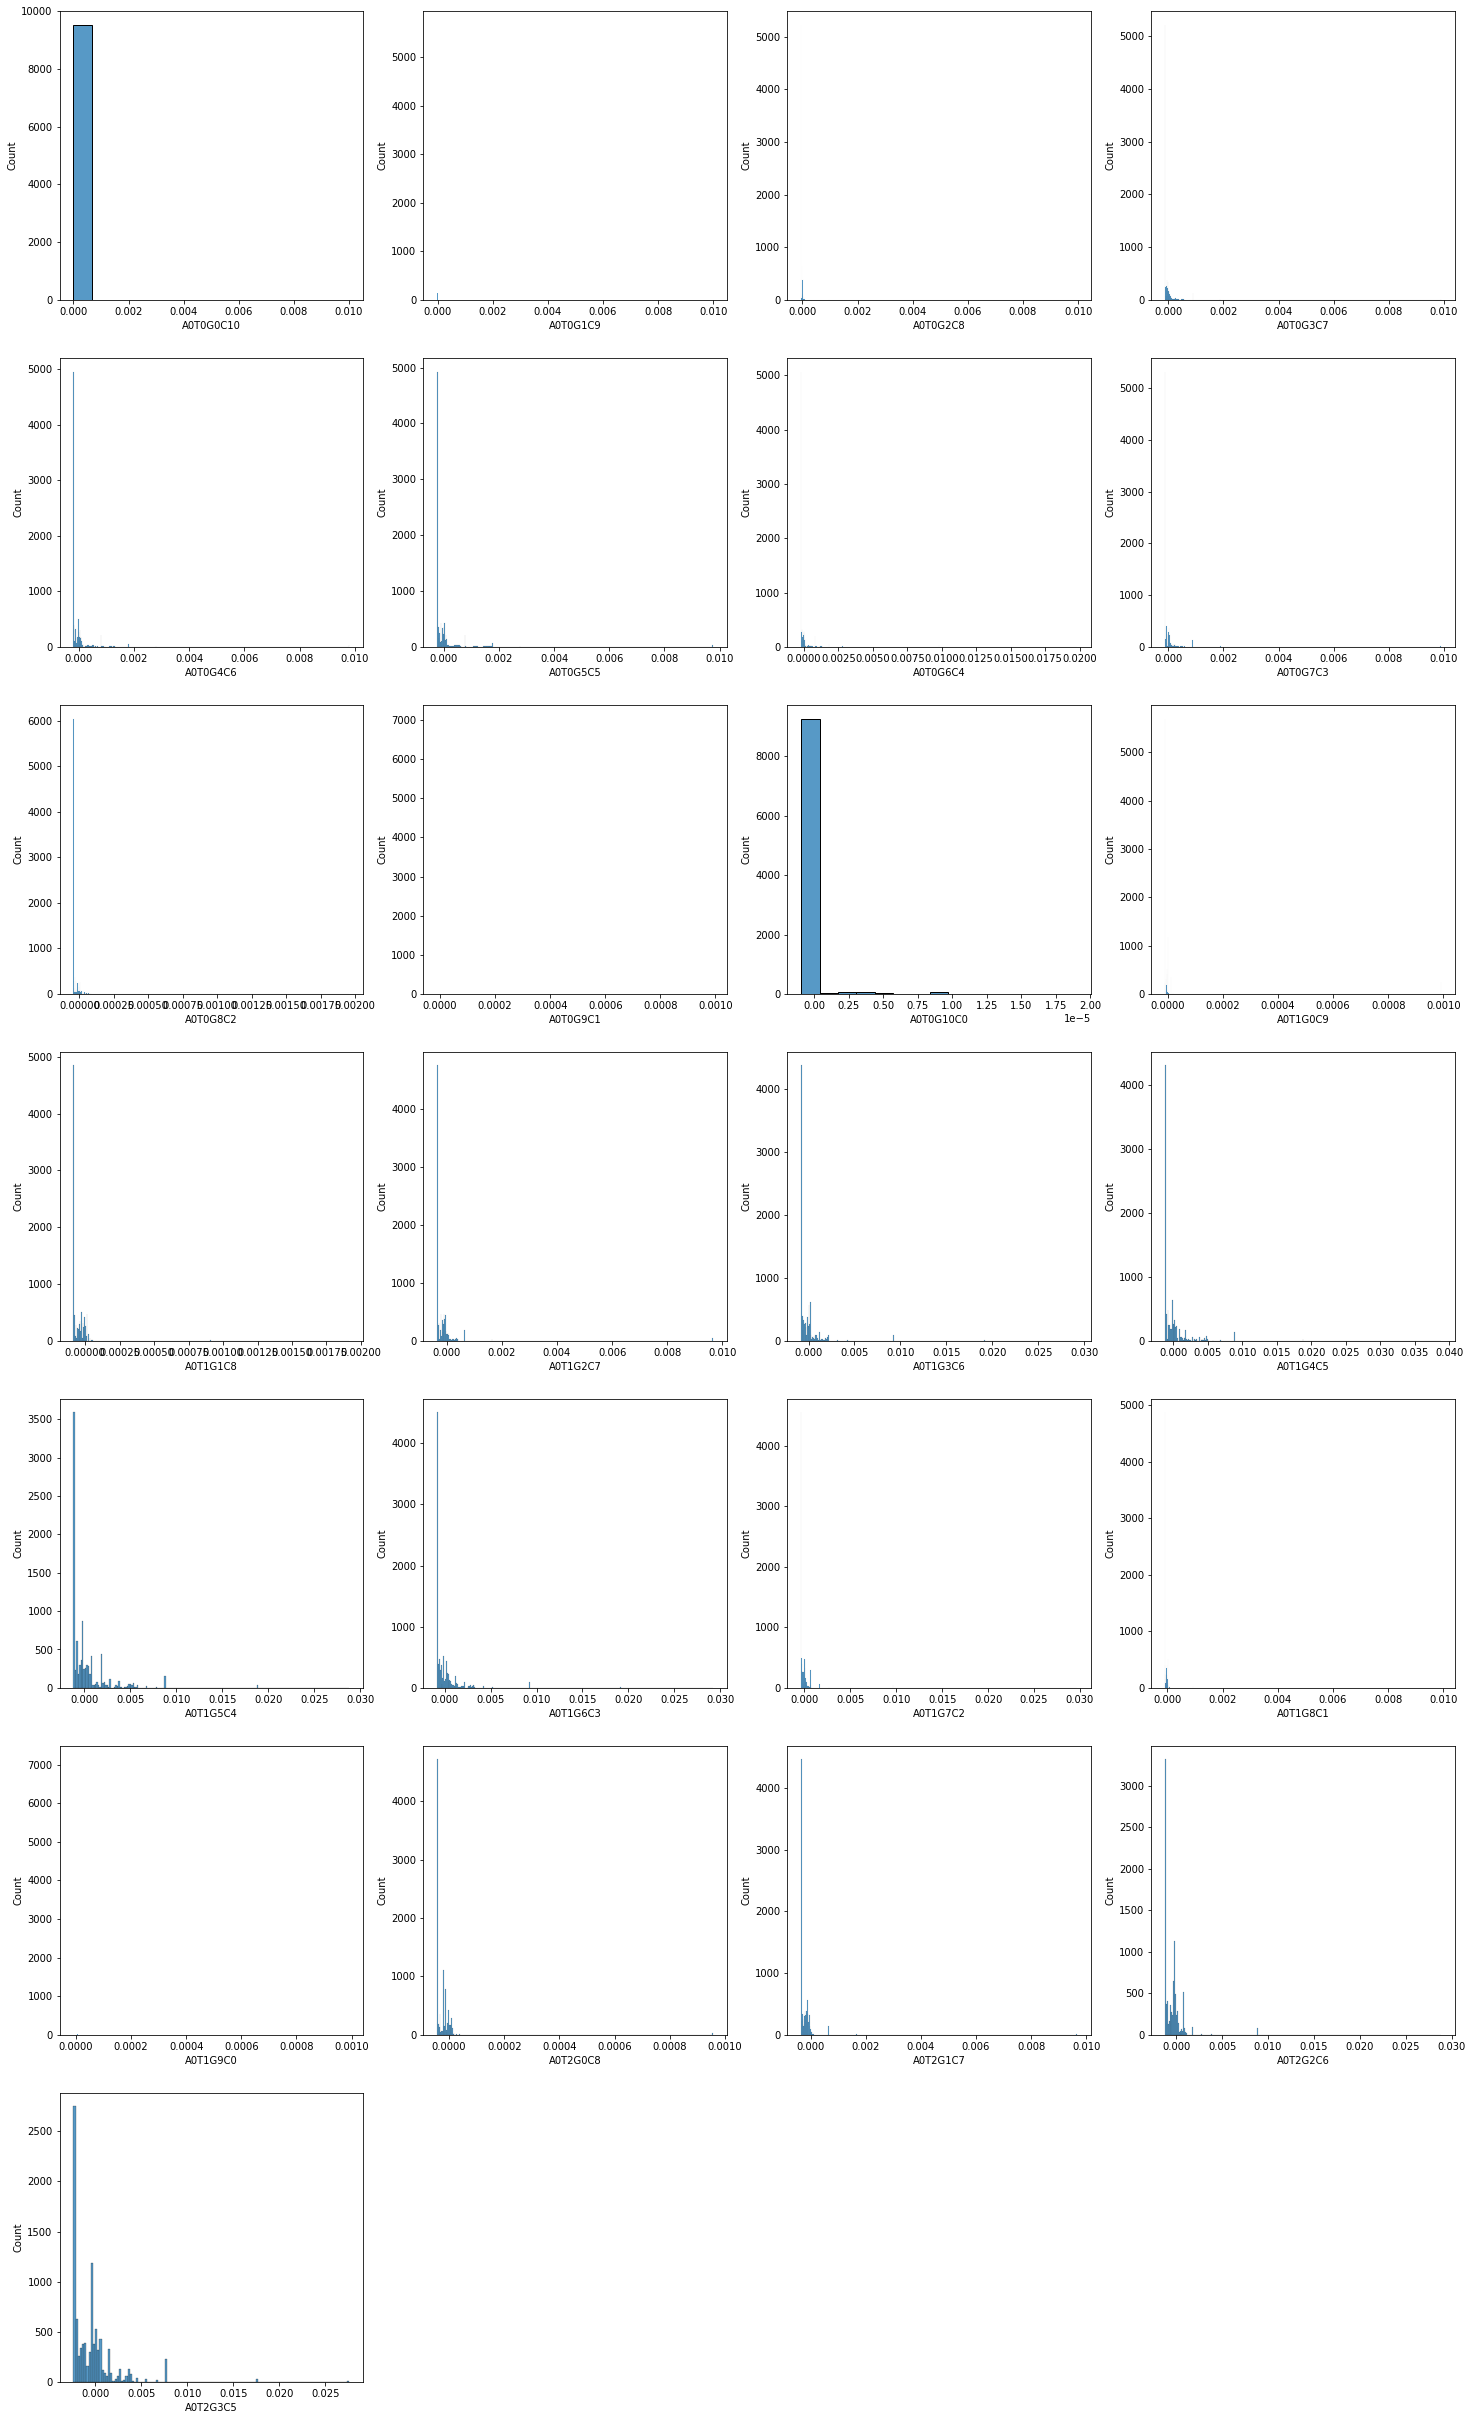

In [27]:
Histograms(df)

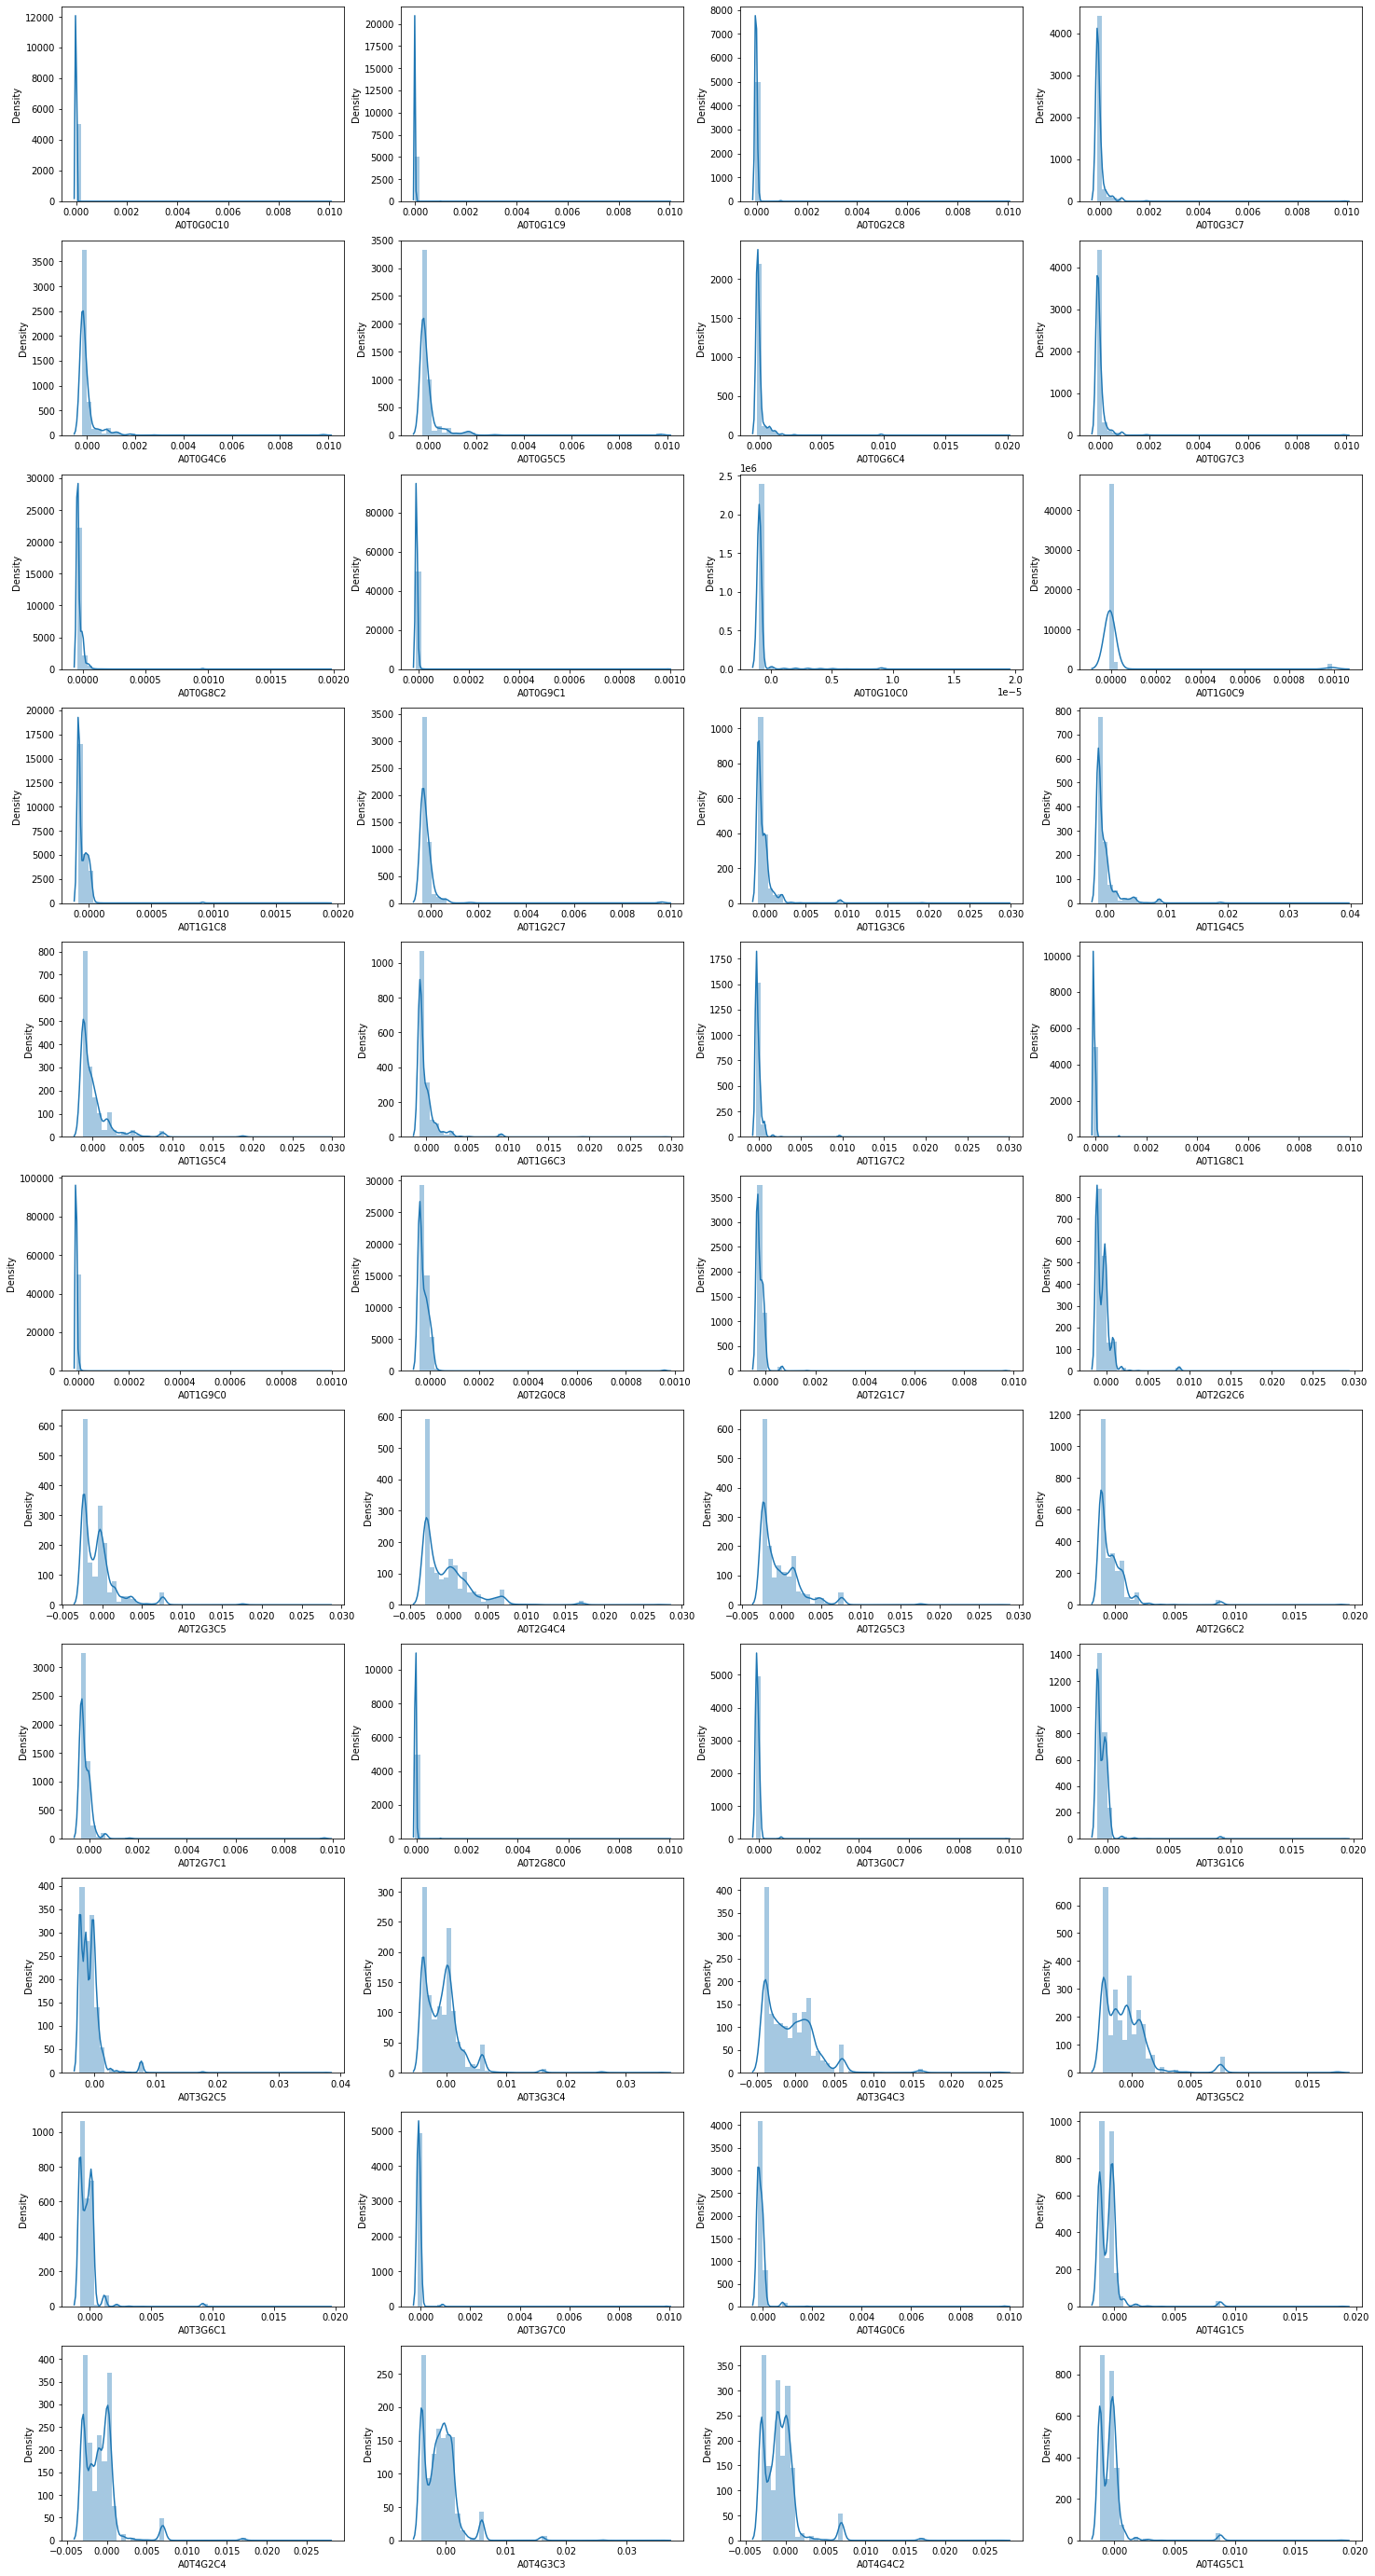

In [28]:
DistPlotDraw(df)

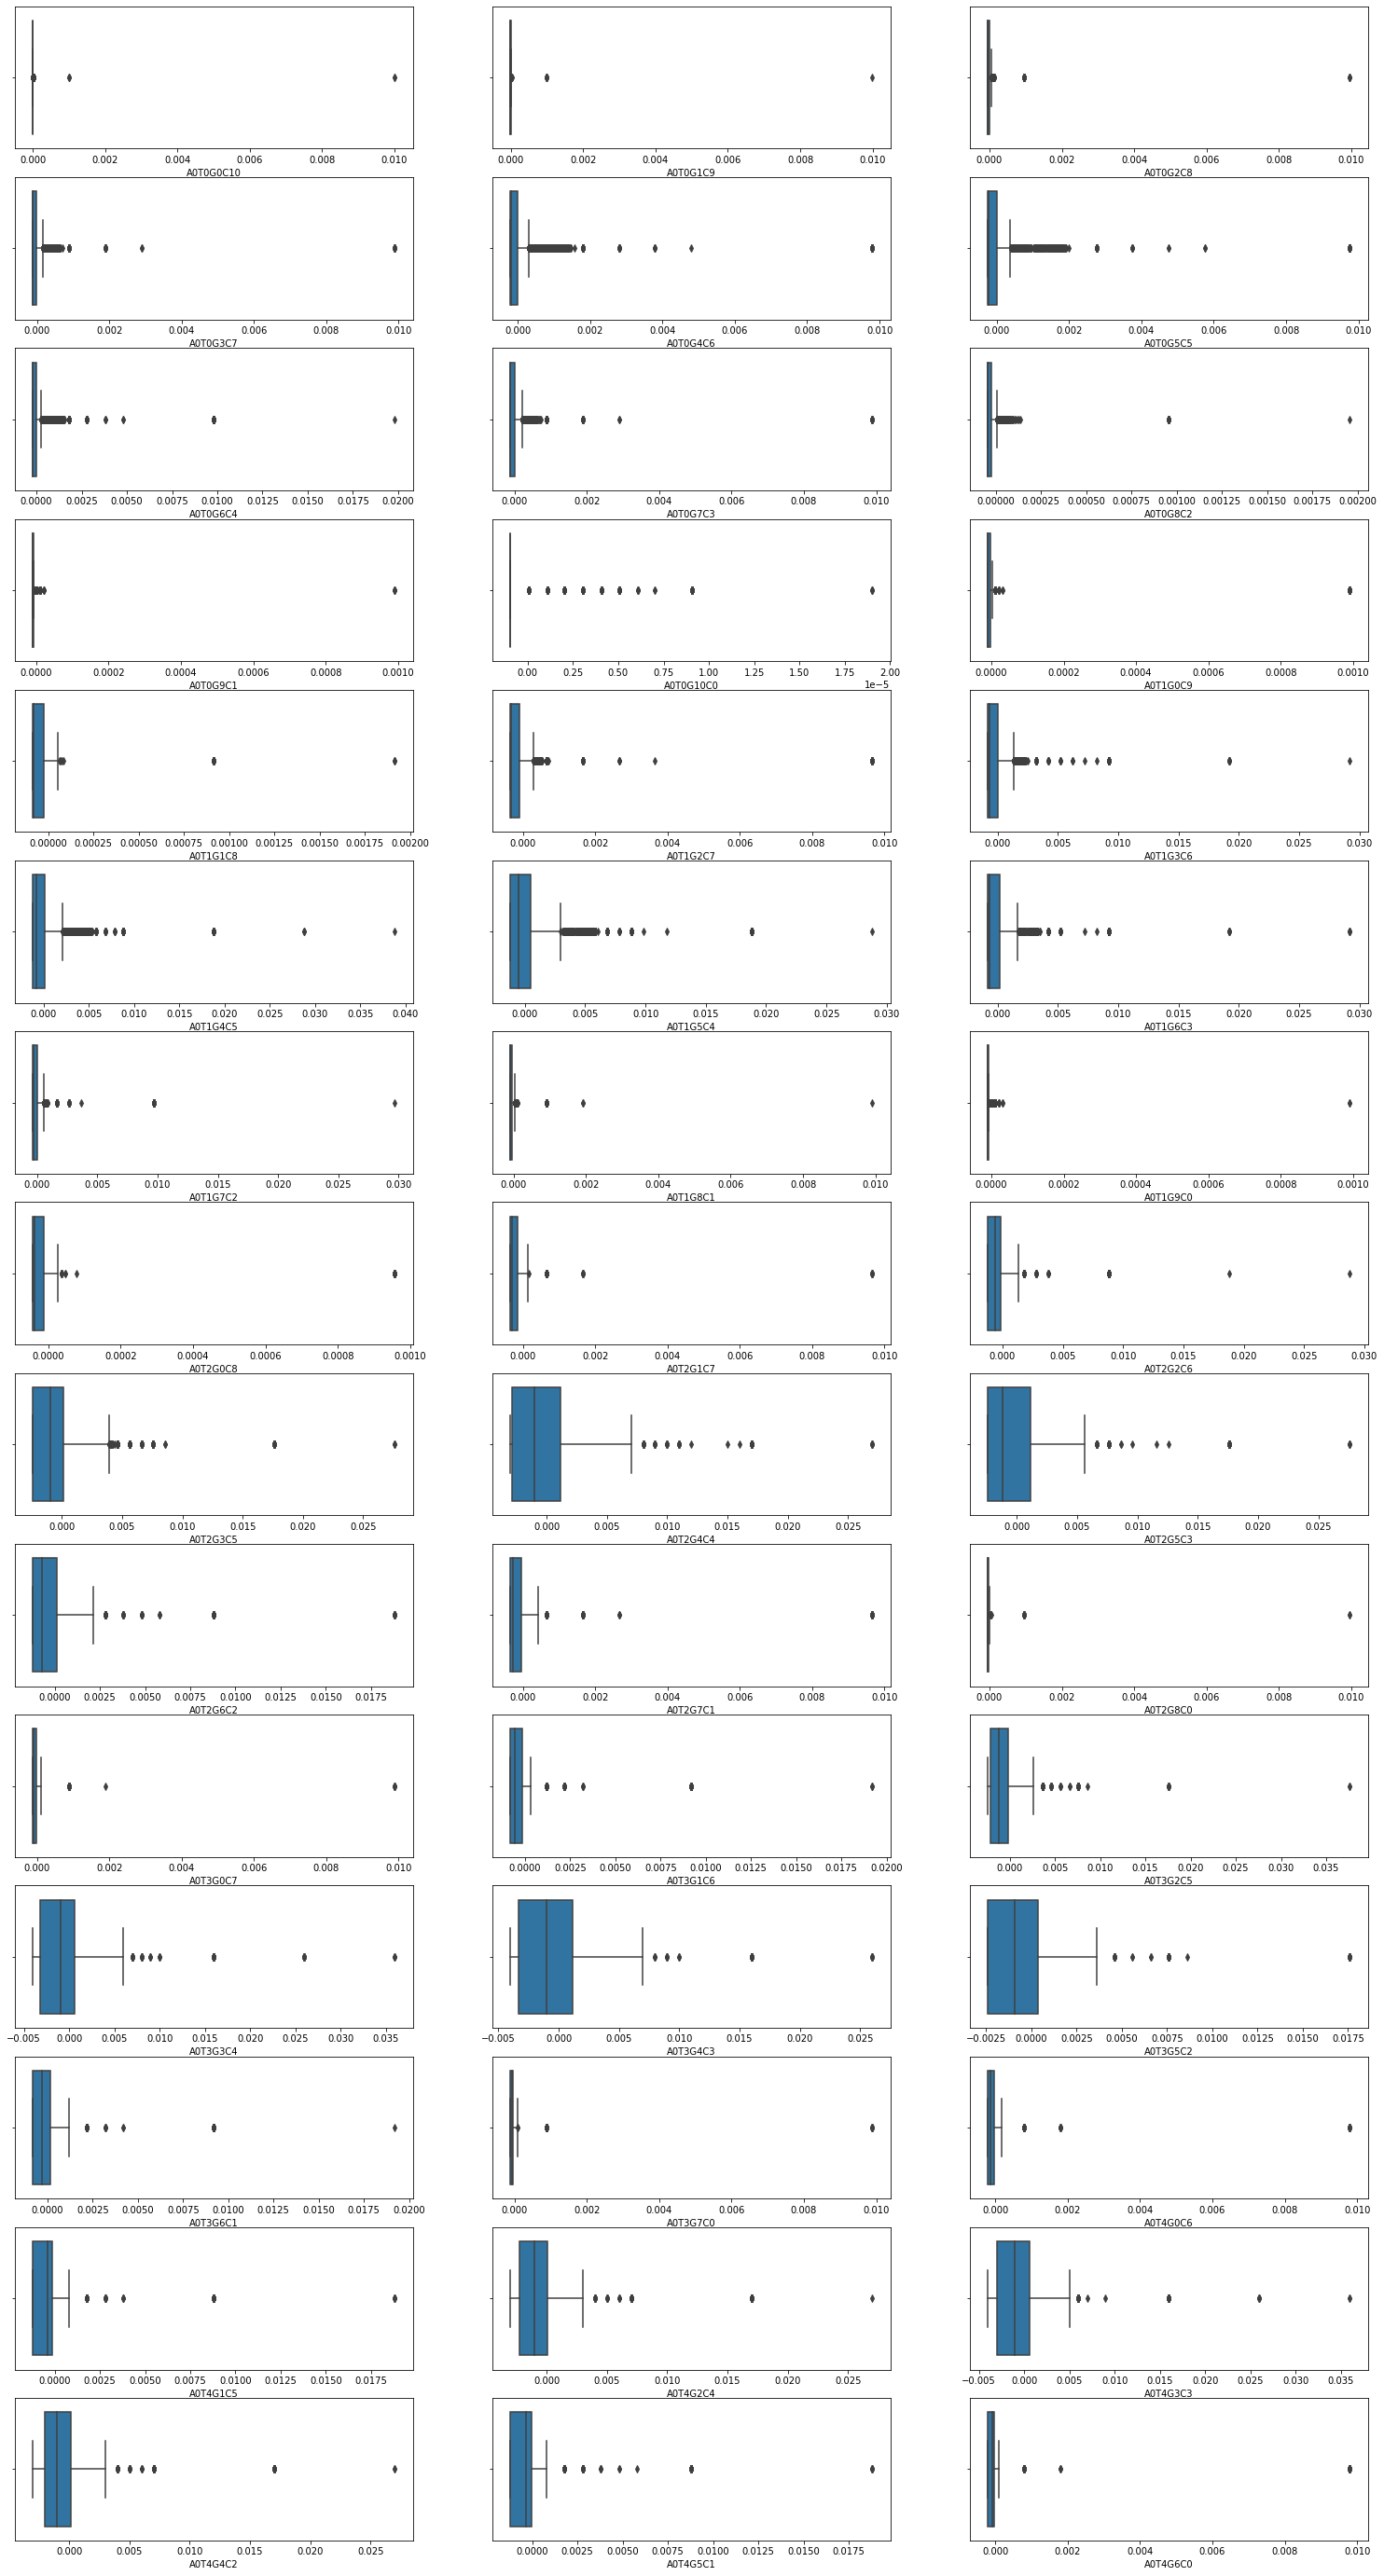

In [29]:
show_boxplot(df)

So we can see that there are outliers. We know the presence of outliers has a huge impact on the result.So we have to deal with them. We cannot delete them but we can replace them. 

In [30]:
def ReplaceOutliers(df):
  for col in colNames:
     if(col!='target'):
      q1=df[col].quantile(0.25)
      q3=df[col].quantile(0.75)
      IQR=q3-q1
      upperBound=q3+(1.5*IQR)
      lowerBound=q1-(1.5*IQR)
      df[col]=np.where(df[col]>upperBound,upperBound,
         np.where(df[col]<lowerBound,lowerBound,df[col]))
  return df  

In [31]:
df=ReplaceOutliers(df)

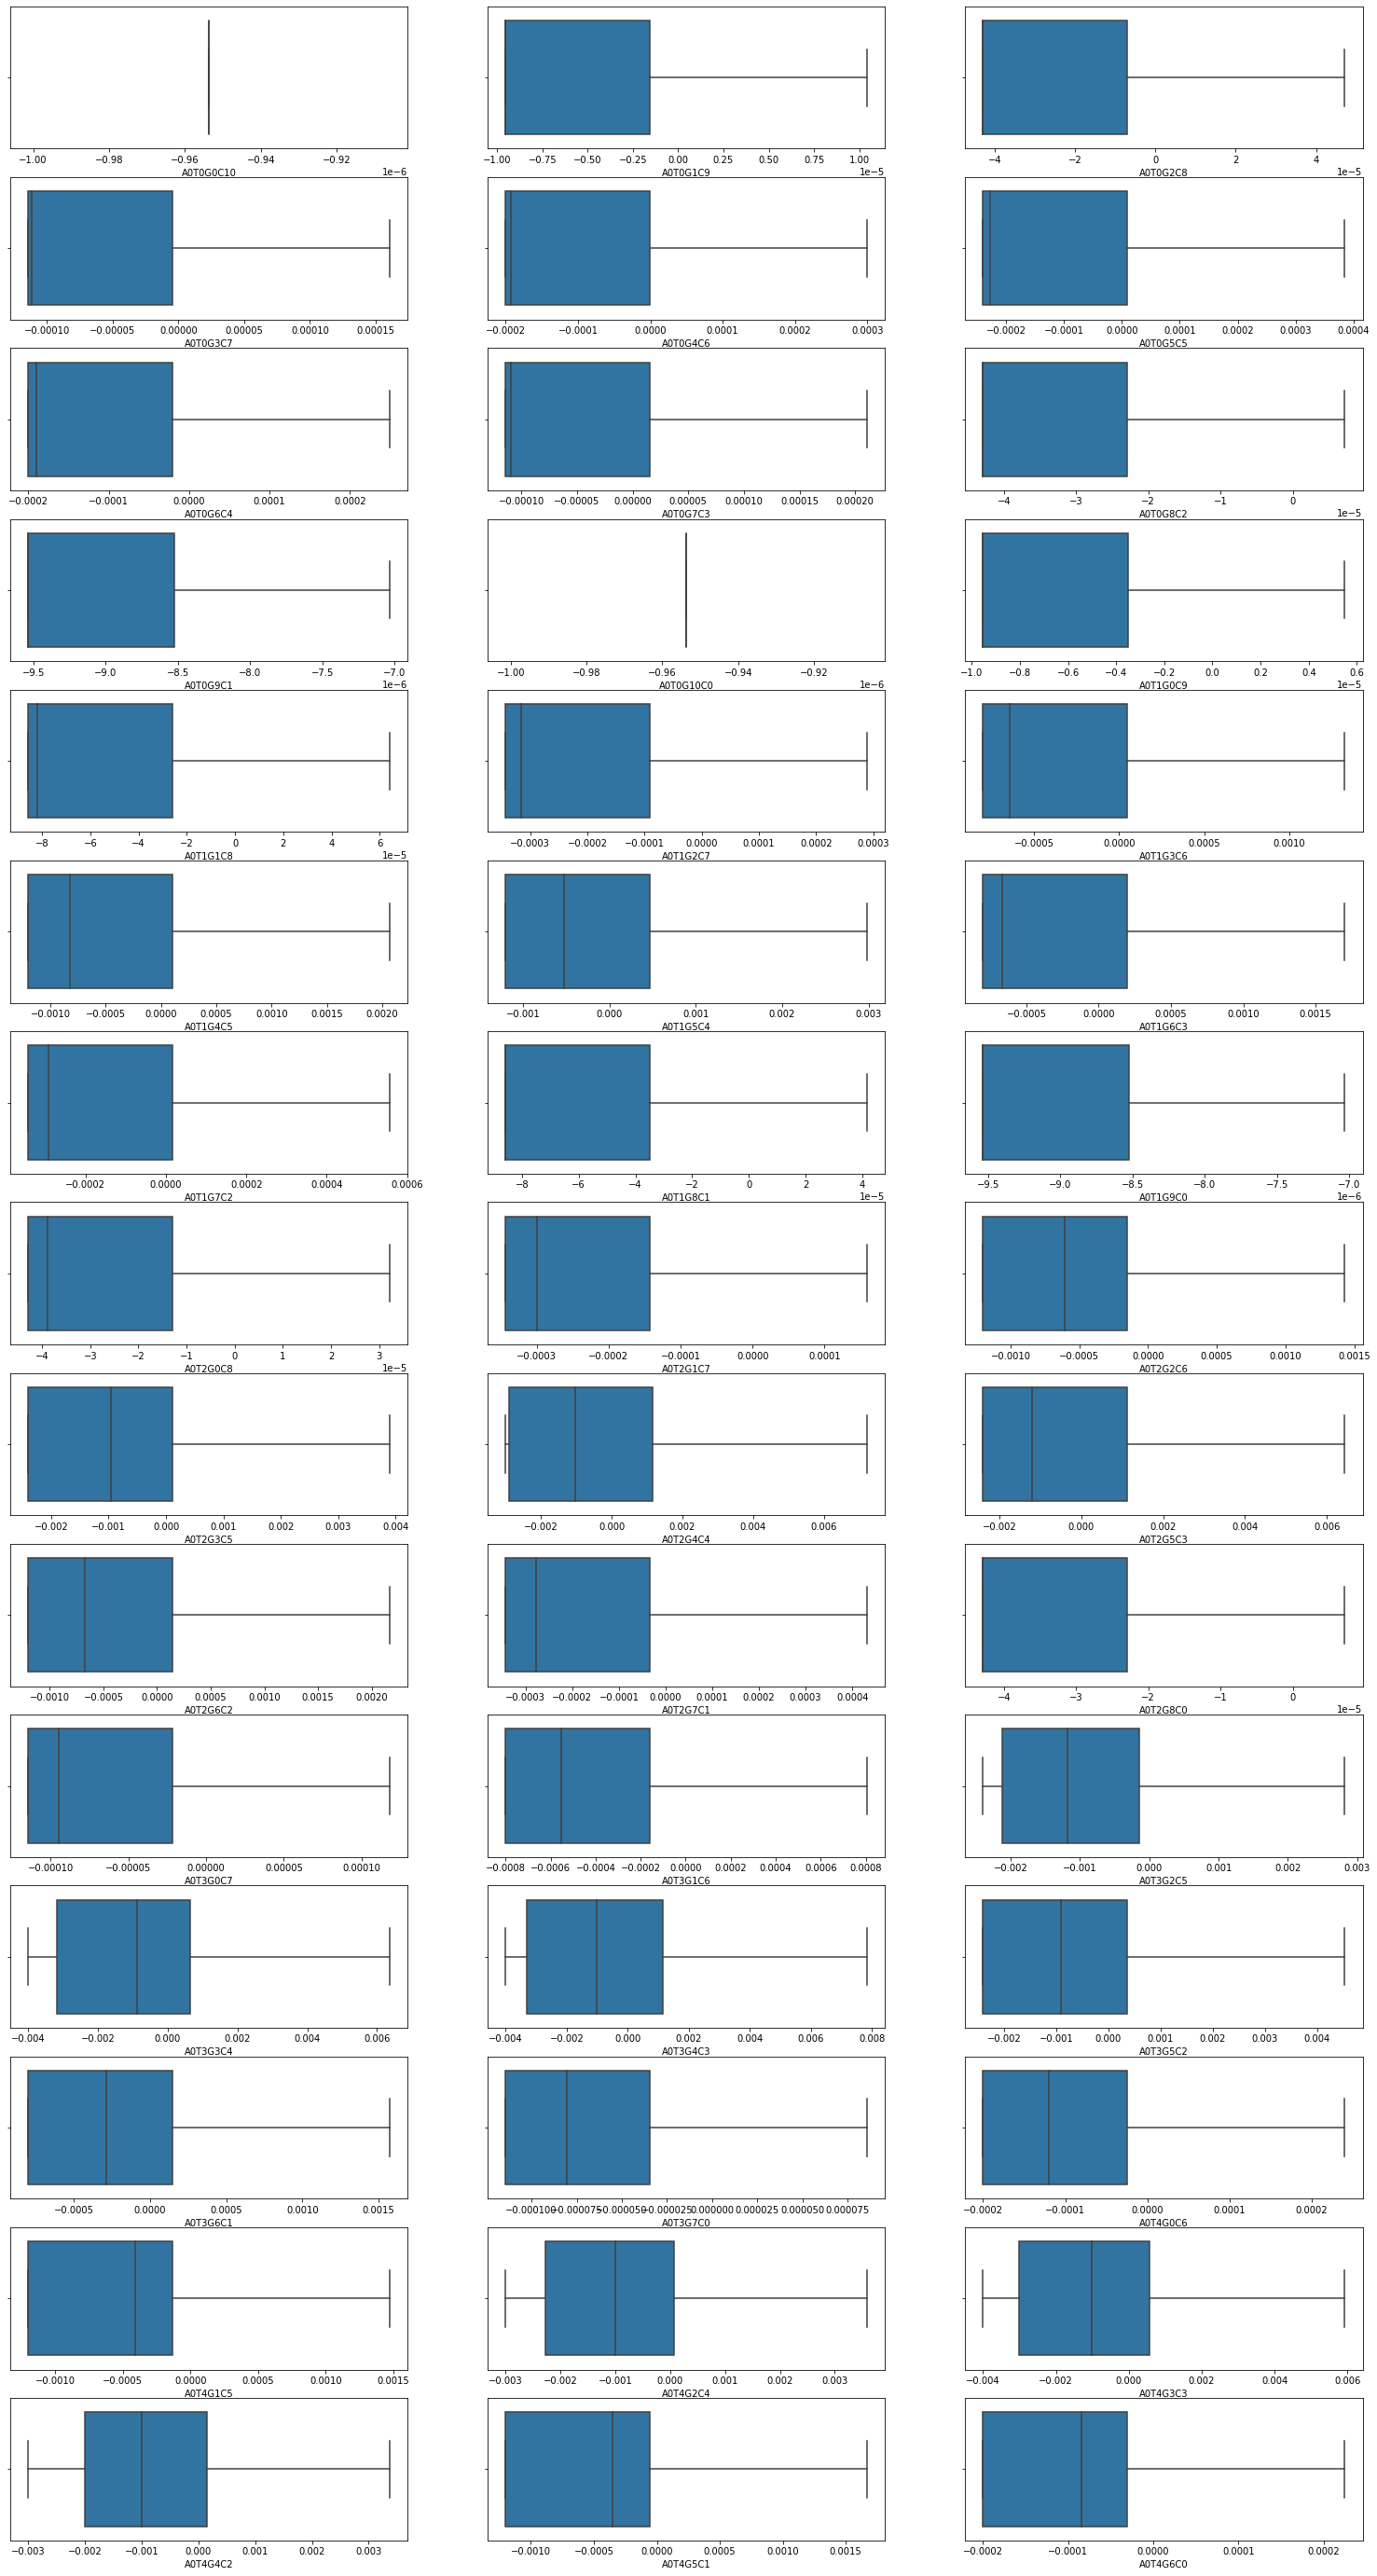

In [32]:
show_boxplot(df)

Now the outliers are gone.

ENCODING THE CATEGORICAL DATA

The machine learning algorithms work fine with the numerical data rather than categorical data. So lets convert the categorical data to numerical data. We will use label encoding here

In [33]:
label_encoder = preprocessing.LabelEncoder()

In [34]:
df['target']=label_encoder.fit_transform(df['target'])

In [35]:
df['target']

0       9
1       6
2       6
3       6
4       2
       ..
9992    2
9993    0
9995    9
9996    9
9997    2
Name: target, Length: 9542, dtype: int64

DATA STANDARDIZATION

We are performing standardization because doing so helps us to datapoints within a range. There are two types of standardization-1)StandardScaler; 2)MinMaxScaler.Here we have used MinMaxScaler; it hepls to keep the datapoints within 0 to 1.

In [36]:
scaler=MinMaxScaler()

In [37]:
df_scaled= pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [38]:
df_scaled

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
1,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.555629,0.470587,0.000000,0.000000,0.000000,0.000000,0.0,0.666667
2,0.0,0.400000,0.555629,0.883016,0.936099,0.816101,0.984632,0.734971,0.878571,1.000000,...,0.124743,0.105514,0.092776,0.090330,0.112209,0.177778,0.092298,0.145027,0.0,0.666667
3,0.0,0.200000,0.611258,1.000000,1.000000,1.000000,1.000000,0.956378,0.798810,1.000000,...,0.173862,0.165768,0.147759,0.135523,0.191163,0.275661,0.128362,0.279929,0.0,0.666667
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.0,1.000000,0.222517,0.290945,0.239986,0.320107,0.177795,0.184567,0.000000,0.000000,...,0.498928,0.521559,0.361134,0.423458,0.438837,1.000000,0.820293,0.749256,0.0,0.222222
9993,0.0,1.000000,0.666887,0.436092,0.359919,0.432087,0.377848,0.399927,0.000000,0.000000,...,0.139396,0.254975,0.144447,0.145847,0.087791,0.000000,0.256418,0.150089,0.0,0.000000
9995,0.0,0.149254,0.166887,0.145581,0.155937,0.131248,0.164547,0.113820,0.320238,0.404762,...,0.455540,0.443892,0.347885,0.337055,0.412558,0.816931,0.594743,0.499702,0.0,1.000000
9996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.975349,0.000000,0.000000,0.000000,0.0,1.000000


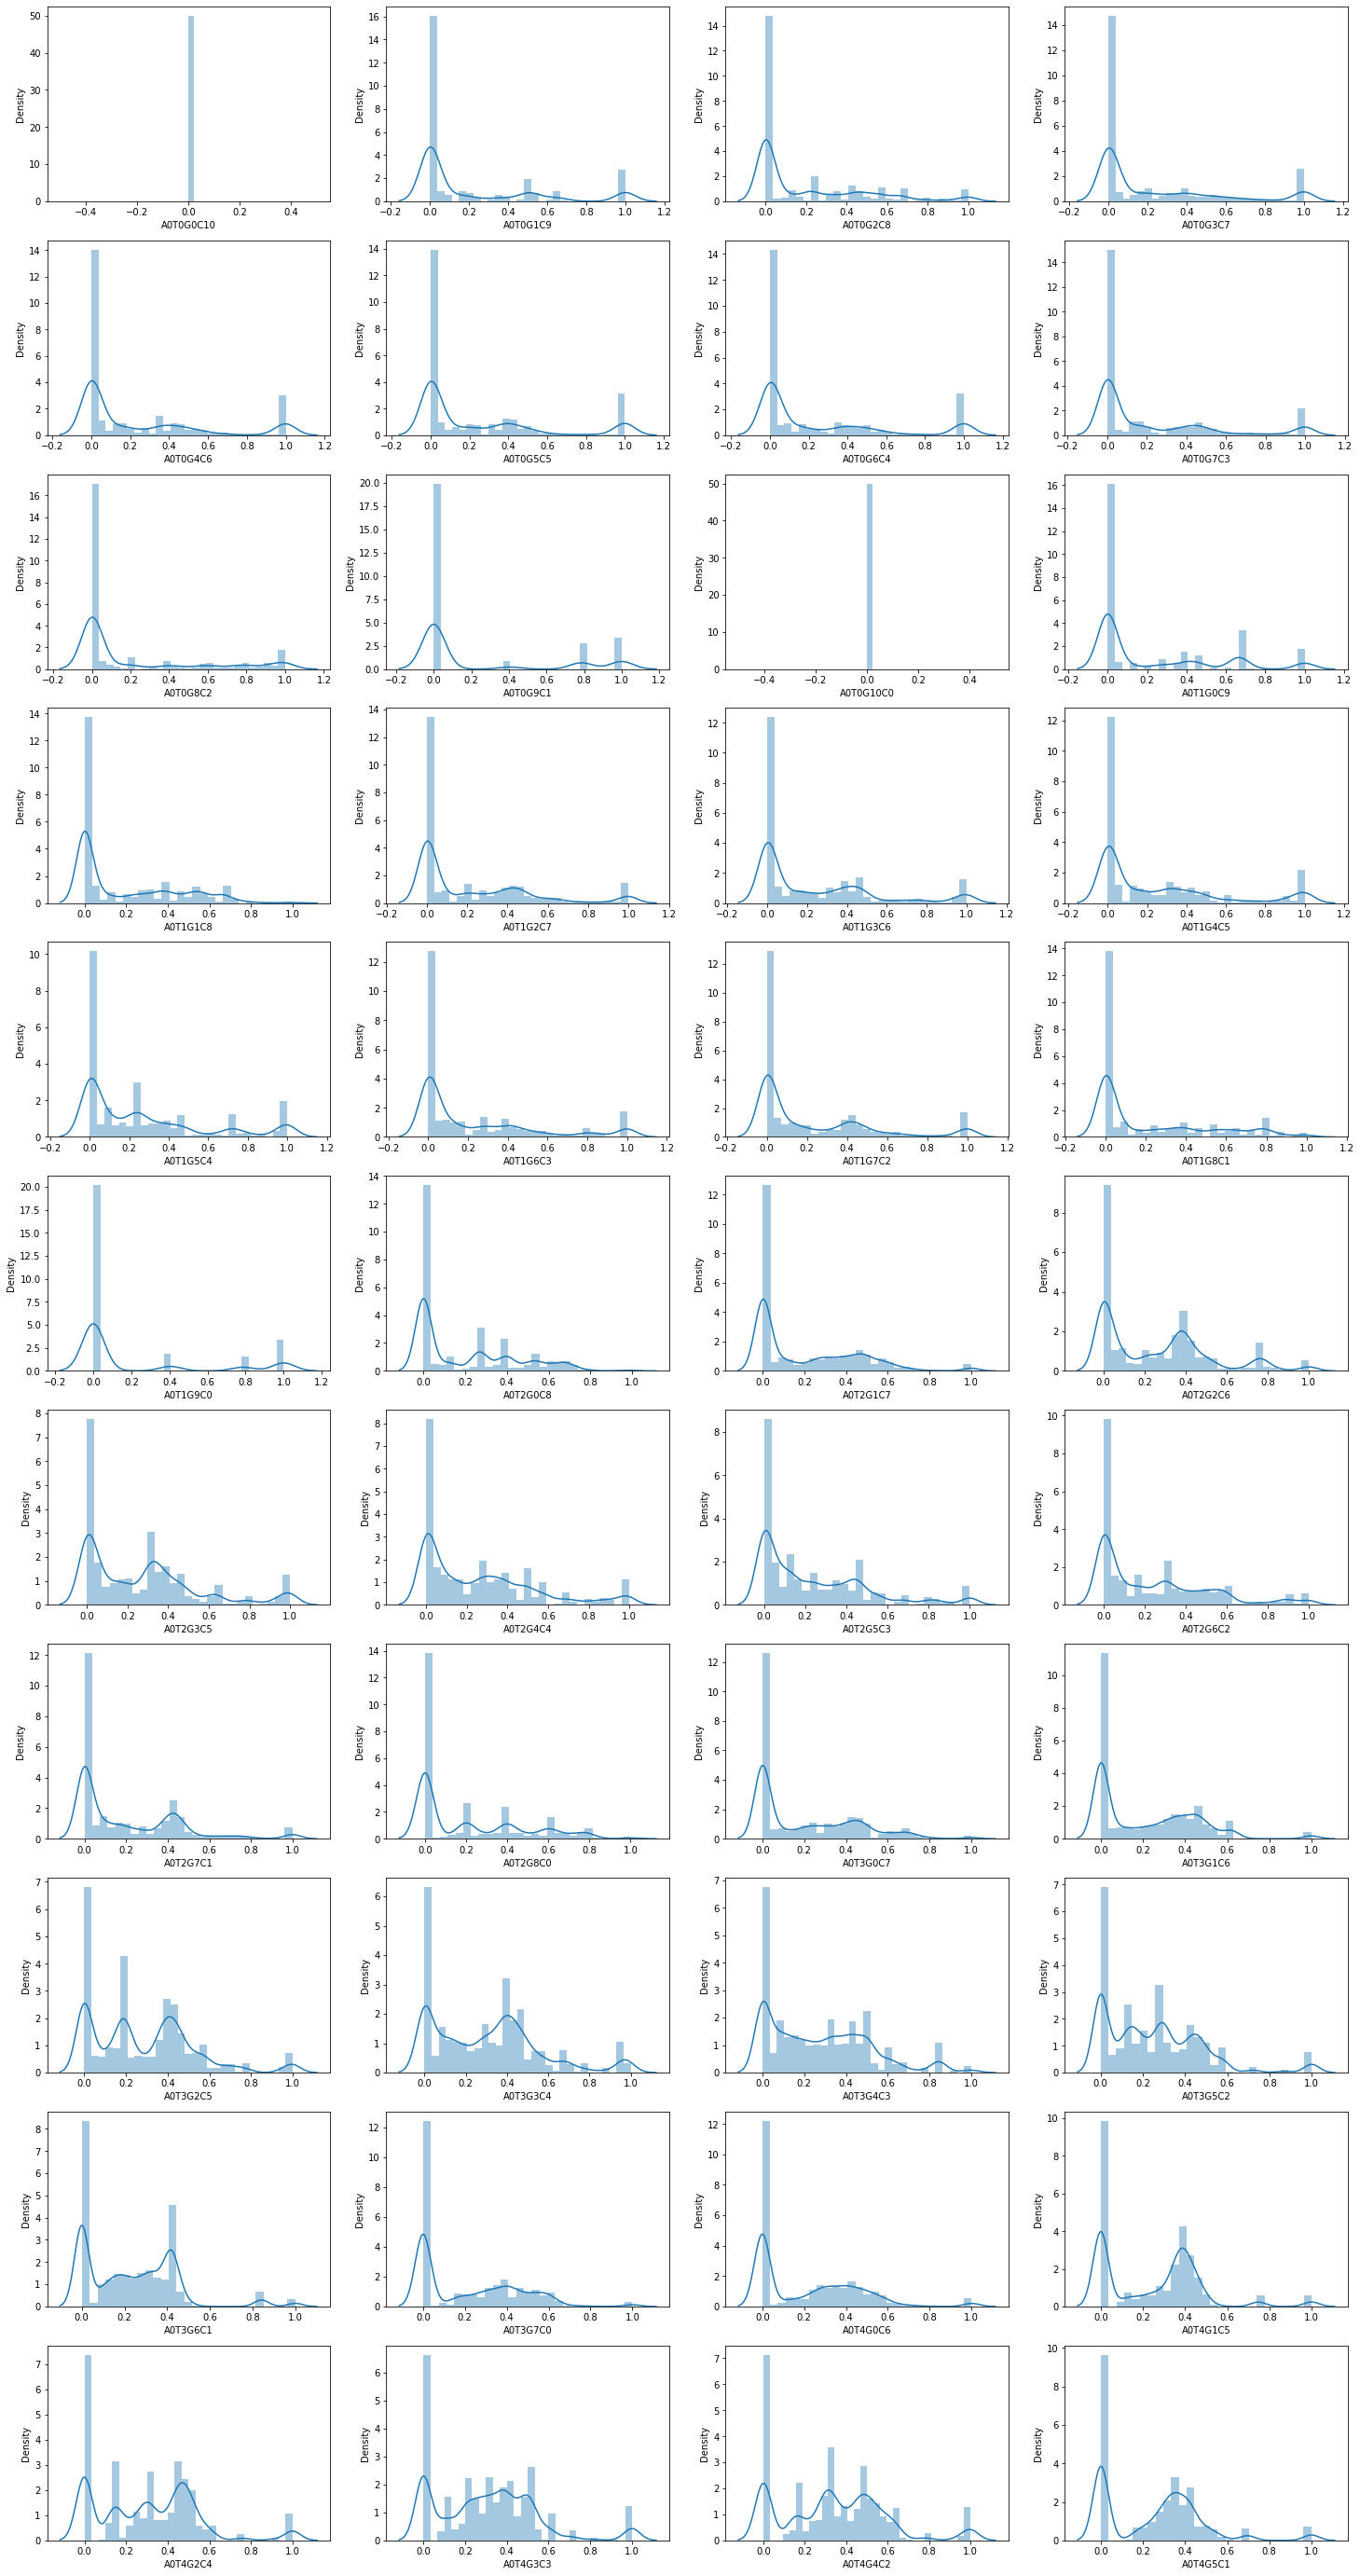

In [39]:
DistPlotDraw(df_scaled)

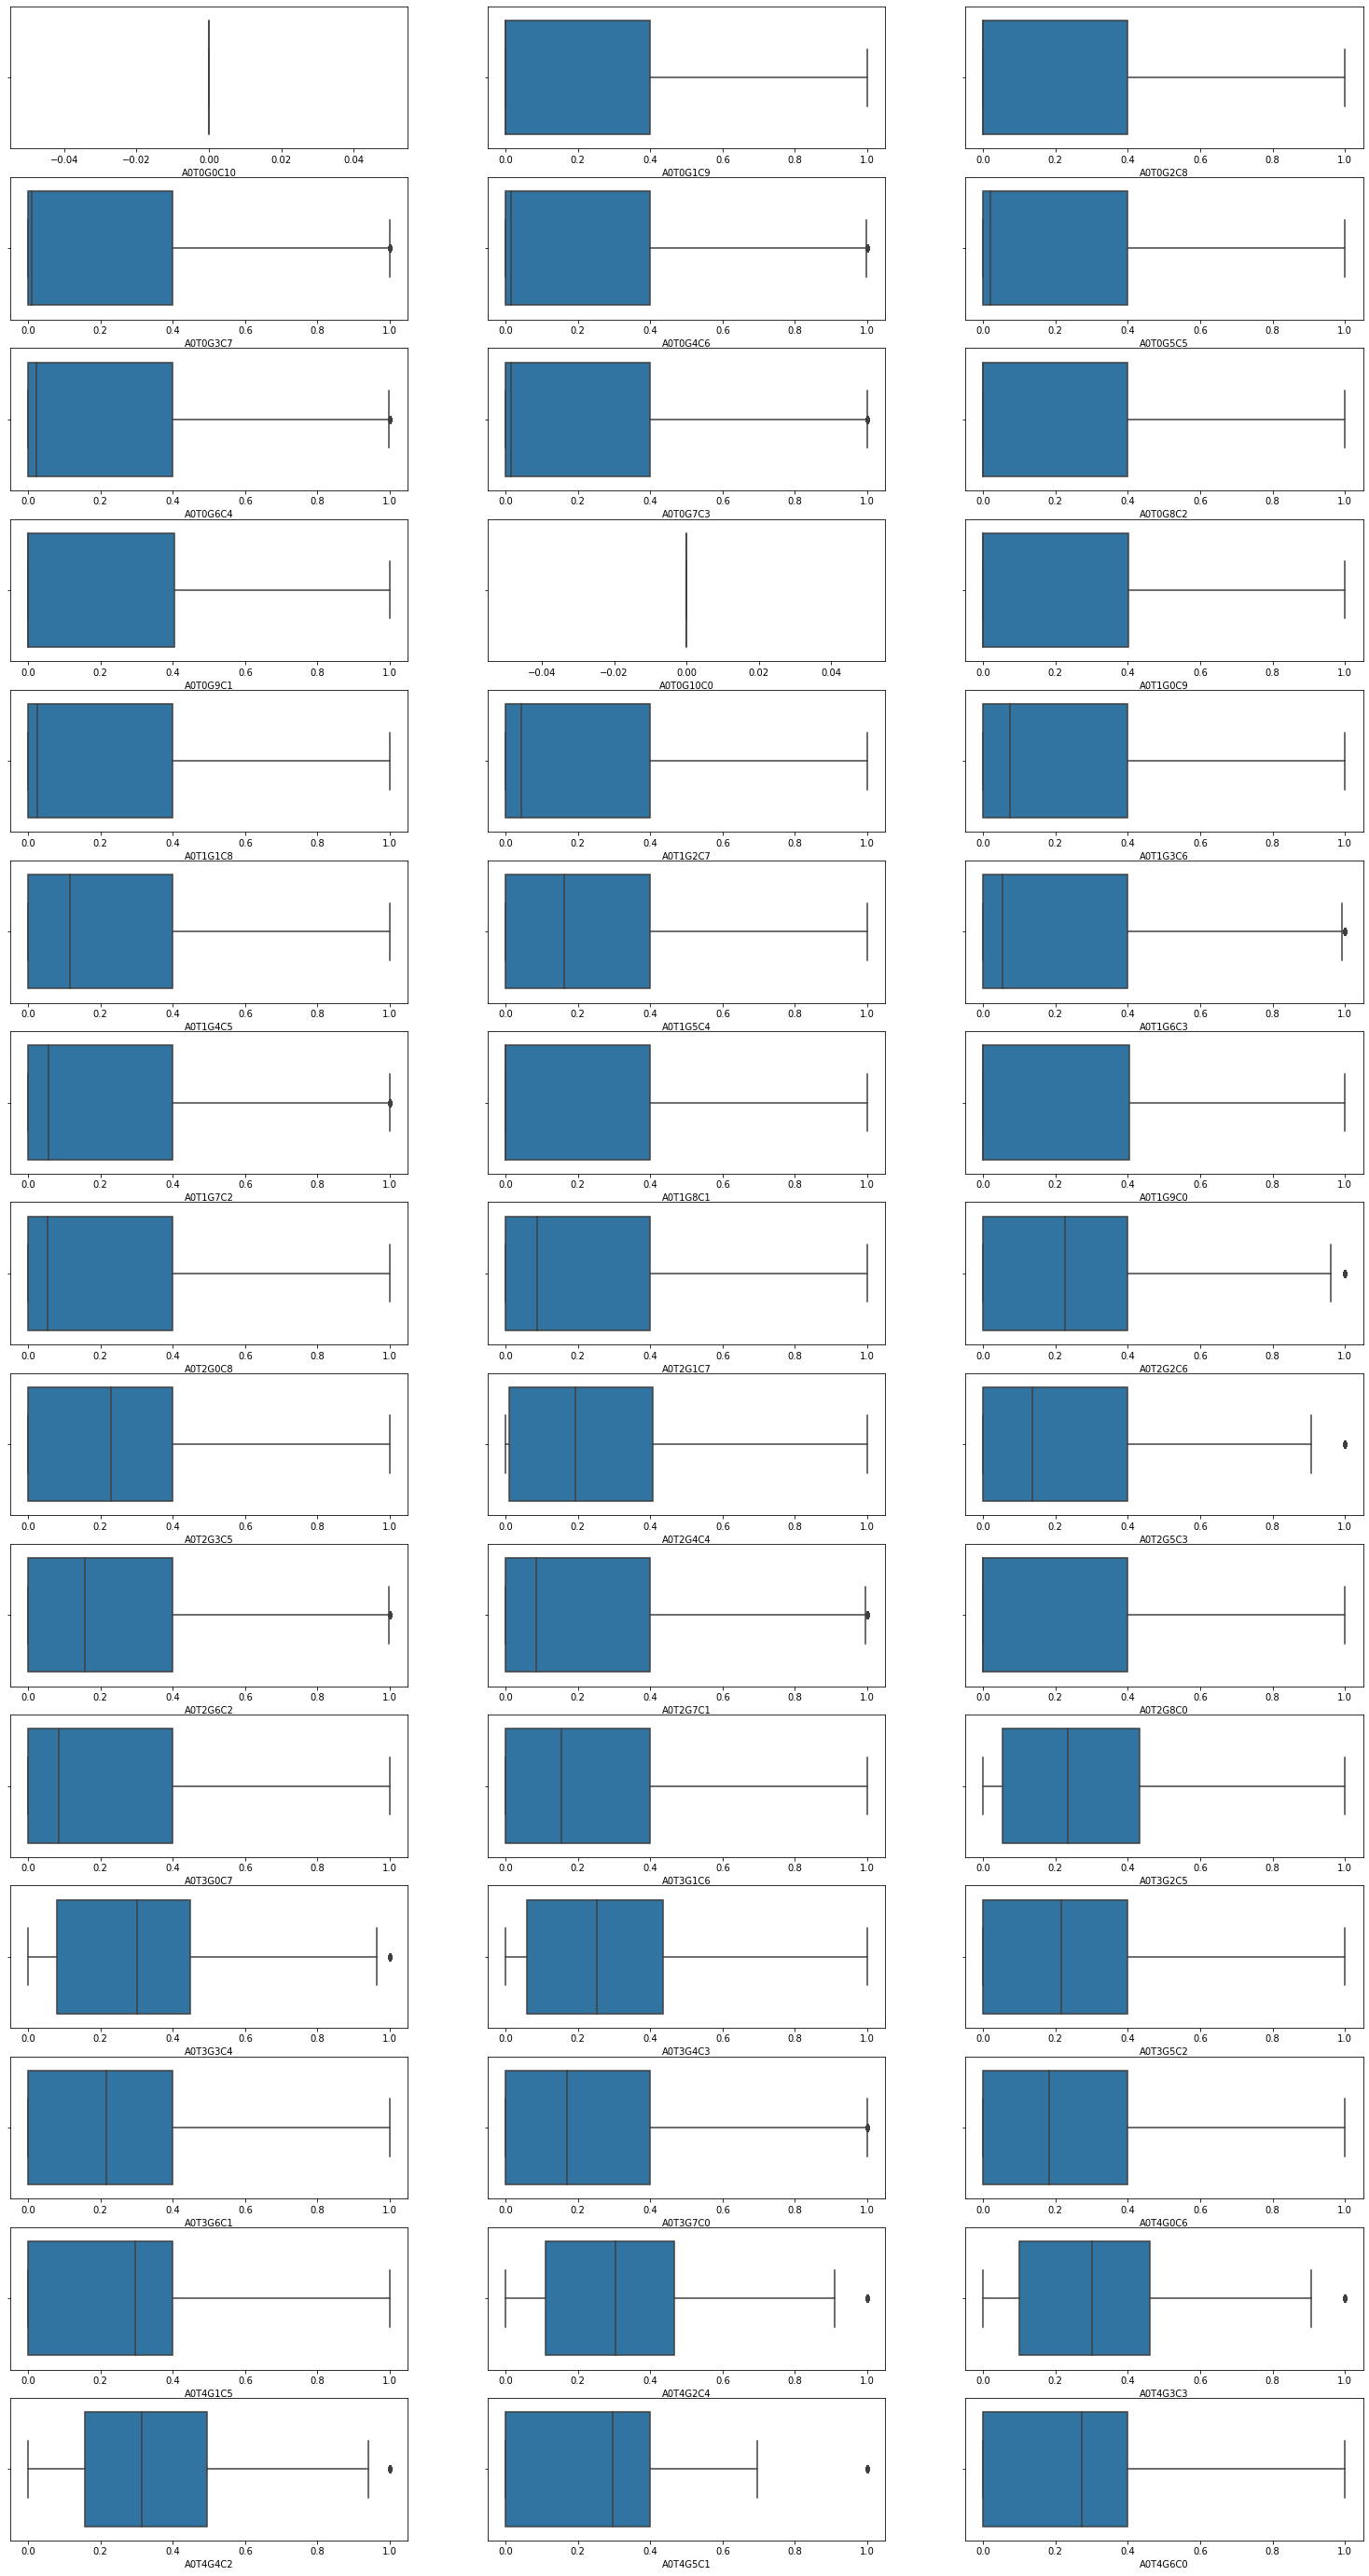

In [40]:
show_boxplot(df_scaled)

NOW SPLITTING THE DATASET

In [41]:
X=df_scaled.drop('target',axis=1)
Y=df['target']

In [42]:
X.shape

(9542, 286)

In [43]:
X

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.555629,0.470587,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.400000,0.555629,0.883016,0.936099,0.816101,0.984632,0.734971,0.878571,1.000000,...,0.212455,0.124743,0.105514,0.092776,0.090330,0.112209,0.177778,0.092298,0.145027,0.0
3,0.0,0.200000,0.611258,1.000000,1.000000,1.000000,1.000000,0.956378,0.798810,1.000000,...,0.277563,0.173862,0.165768,0.147759,0.135523,0.191163,0.275661,0.128362,0.279929,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.0,1.000000,0.222517,0.290945,0.239986,0.320107,0.177795,0.184567,0.000000,0.000000,...,0.549762,0.498928,0.521559,0.361134,0.423458,0.438837,1.000000,0.820293,0.749256,0.0
9993,0.0,1.000000,0.666887,0.436092,0.359919,0.432087,0.377848,0.399927,0.000000,0.000000,...,0.250000,0.139396,0.254975,0.144447,0.145847,0.087791,0.000000,0.256418,0.150089,0.0
9995,0.0,0.149254,0.166887,0.145581,0.155937,0.131248,0.164547,0.113820,0.320238,0.404762,...,0.592372,0.455540,0.443892,0.347885,0.337055,0.412558,0.816931,0.594743,0.499702,0.0
9996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.975349,0.000000,0.000000,0.000000,0.0


In [44]:
Y.shape

(9542,)

In [45]:
Y

0       9
1       6
2       6
3       6
4       2
       ..
9992    2
9993    0
9995    9
9996    9
9997    2
Name: target, Length: 9542, dtype: int64

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Now we will fit the models to different classification models

In [47]:
accuracy=[]
R2_Score=[]
F1_Score=[]
PRECISION=[]
RECALL=[]
AUC=[]

Random Forest

In [48]:
rfc=RandomForestClassifier(random_state=42)

In [49]:
rfc=RandomForestClassifier(n_estimators=300,criterion='entropy',n_jobs=-1,random_state=42)

n_estimators tells us how many trees do we want. as we know Random Forest is a collection of many Decision Trees. Splitting till the end will cause a lot of time so we limit it by giving it a limit

In [50]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [51]:
Y_pred=rfc.predict(X_test)

In [52]:
Y_pred

array([6, 9, 6, ..., 0, 4, 4])

In [53]:
Y_pred_proba=rfc.predict_proba(X_test)

In [54]:
Y_pred_proba

array([[0.01666667, 0.00333333, 0.02      , ..., 0.01      , 0.00333333,
        0.02333333],
       [0.        , 0.00333333, 0.03333333, ..., 0.        , 0.01      ,
        0.95333333],
       [0.04      , 0.01      , 0.04      , ..., 0.00666667, 0.02      ,
        0.03333333],
       ...,
       [0.98333333, 0.        , 0.        , ..., 0.        , 0.01666667,
        0.        ],
       [0.00666667, 0.        , 0.00333333, ..., 0.        , 0.00333333,
        0.00333333],
       [0.11333333, 0.05      , 0.09      , ..., 0.04666667, 0.13333333,
        0.10666667]])

EVALUATION METRICS OF RANDOM FOREST CLASSIFIER

In [55]:
#Accuracy Score
accuracyRandomForest=metrics.accuracy_score(Y_test,Y_pred)
accuracy.append(accuracyRandomForest)

In [56]:
#R2-Score
R2_score_Random_Forest=metrics.r2_score(Y_test,Y_pred)
R2_Score.append(R2_score_Random_Forest)

In [57]:
#Precision Score
precision_score_random_forest=metrics.precision_score(Y_test,Y_pred,average='micro')
PRECISION.append(precision_score_random_forest)

In [58]:
#RECALL SCORE
recall_score_random_forest=metrics.recall_score(Y_test,Y_pred,average='micro')
RECALL.append(recall_score_random_forest)

In [59]:
#F1-SCORE
f1_score_random_forest=metrics.f1_score(Y_test,Y_pred,average='micro')
F1_Score.append(f1_score_random_forest)

In [60]:
#AUC SCORE
auc_score_random_forest=metrics.roc_auc_score(Y_test,Y_pred_proba,multi_class='ovr')
AUC.append(auc_score_random_forest)

In [61]:
AUC

[0.9851320112862834]

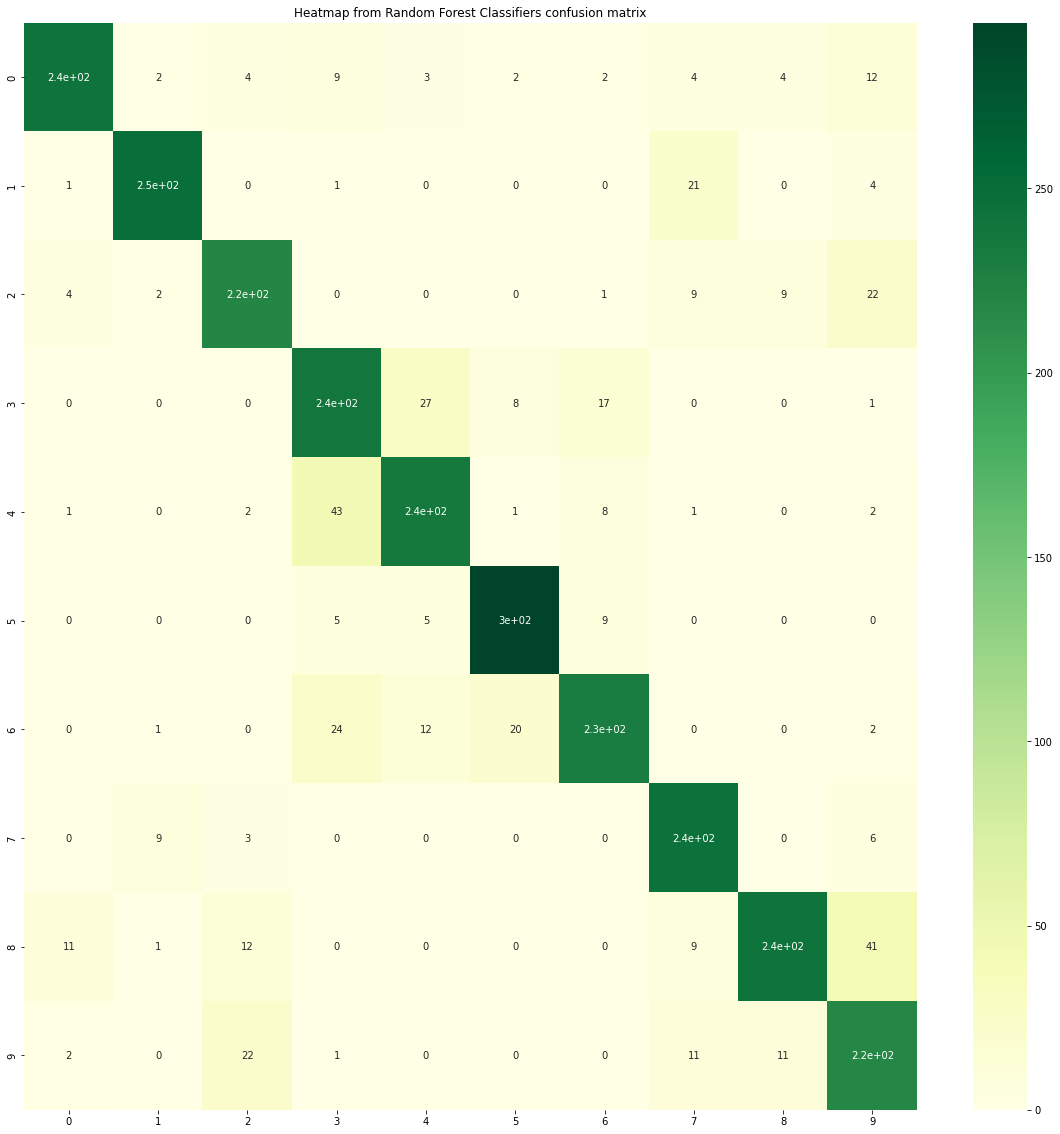

In [62]:
#CONFUSION MATRIX
cm=metrics.confusion_matrix(Y_test,Y_pred)
#Associated Heatmap from Confusion Matrix
plt.figure(figsize=(20,20))
plt.title("Heatmap from Random Forest Classifiers confusion matrix")
sns.heatmap(cm,annot=True,cmap='YlGn')

DECISION TREE

In [63]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=100,random_state=50,min_samples_split=2)

In [64]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=100, random_state=50)

In [65]:
y_pred_dt=dt.predict(X_test)

In [66]:
y_pred_proba_dt=dt.predict_proba(X_test)

EVALUATION METRICS OF RANDOM FOREST CLASSIFIER

In [67]:
#Accuracy Score
accuracy_score_Decision_tree=metrics.accuracy_score(Y_test,y_pred_dt)
accuracy.append(accuracy_score_Decision_tree)

#R2-Score
R2_score_decision_tree=metrics.r2_score(Y_test,y_pred_dt)
R2_Score.append(R2_score_decision_tree)

#Precision Score
precision_score_decision_tree=metrics.precision_score(Y_test,y_pred_dt,average='micro')
PRECISION.append(precision_score_decision_tree)

#RECALL SCORE
recall_score_decision_tree=metrics.recall_score(Y_test,y_pred_dt,average='micro')
RECALL.append(recall_score_decision_tree)

#F1-SCORE
f1_score_decision_tree=metrics.f1_score(Y_test,y_pred_dt,average='micro')
F1_Score.append(f1_score_decision_tree)

#AUC SCORE
auc_score_decision_tree=metrics.roc_auc_score(Y_test,y_pred_proba_dt,multi_class='ovr')
AUC.append(auc_score_decision_tree)


In [68]:
AUC

[0.9851320112862834, 0.8163462197265681]

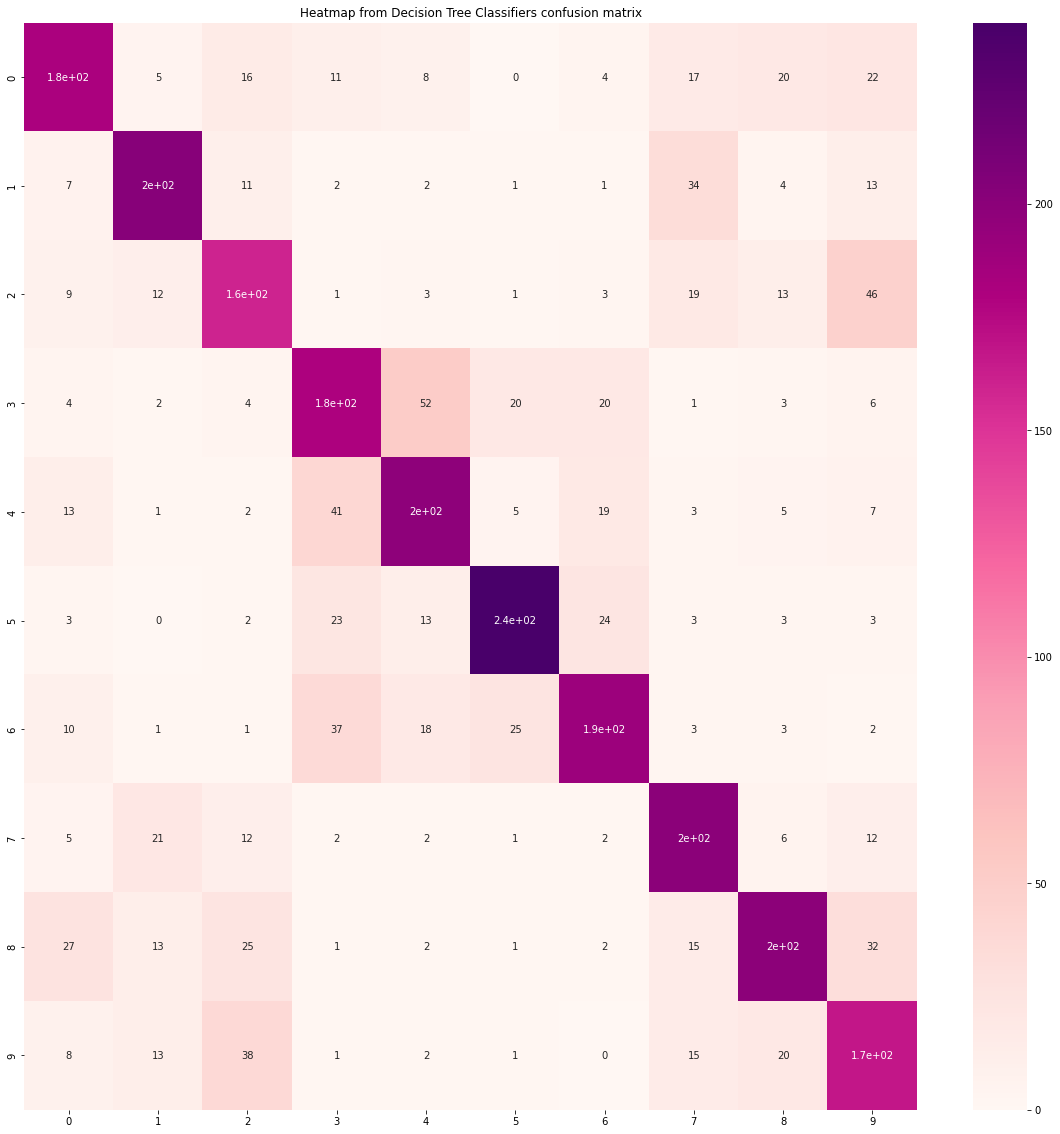

In [69]:
#CONFUSION MATRIX
cm_dt=metrics.confusion_matrix(Y_test,y_pred_dt)
#Associated Heatmap from Confusion Matrix
plt.figure(figsize=(20,20))
plt.title("Heatmap from Decision Tree Classifiers confusion matrix")
sns.heatmap(cm_dt,annot=True,cmap='RdPu')

We can use GridSearchCV, RandomizedSeachCV to find the hyperparameters so that we get the best fit i.e get good accuracy result

These methods are done here.... First we have used GridSearchCV then RandomizedSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [10, 1, 0.1, 0.01, 0.0001],
              'max_depth' : [70,80,90,100],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [10, 1, 0.1, 0.01, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [70, 80, 90, 100],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

The below snippet gives us the parameters of Decision tree classifier. This says that if we use these parameter we are bound to get the best results.

In [71]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=70,
                       max_features='auto', random_state=42)

Then we are instantiting the object using the parameters mentioned above

In [72]:
tree_class = DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=70, max_features='auto',
                       random_state=42)
tree_class.fit(X_train, Y_train)
y_predict = tree_class.predict(X_test)
y_pred_prob=tree_class.predict_proba(X_test)


We can evaluate the metrics of this model as well

Accuracy Score

In [73]:
print("Accuracy Score of Decision Tree Using GridSearchCV is ",metrics.accuracy_score(Y_test,y_predict))

Accuracy Score of Decision Tree Using GridSearchCV is  0.6685295144952846


R2-Score

In [74]:
print("R2-Score of Decision Tree Using GridSearchCV is ",metrics.r2_score(Y_test,y_predict))

R2-Score of Decision Tree Using GridSearchCV is  0.2049838031839285


Precision Score

In [75]:
print("Precision Score of Decision Tree Using GridSearchCV is :" ,metrics.precision_score(Y_test,y_predict,average='micro'))

Precision Score of Decision Tree Using GridSearchCV is : 0.6685295144952846


Recall Score

In [76]:
print("Recall Score of Decision Tree Using GridSearchCV is ",metrics.recall_score(Y_test,y_predict,average='micro'))

Recall Score of Decision Tree Using GridSearchCV is  0.6685295144952846


F-1 Score

In [77]:
print("F-1 Score of Decision Tree Using GridSearchCV is :",metrics.f1_score(Y_test,y_predict,average='micro'))

F-1 Score of Decision Tree Using GridSearchCV is : 0.6685295144952846


ROC_AUC_SCORE

In [78]:
print("AUC Score of Decision Tree Using GridSearchCV is: ",metrics.roc_auc_score(Y_test,y_pred_prob,multi_class="ovr"))

AUC Score of Decision Tree Using GridSearchCV is:  0.8169069242080657


In [79]:
grid_search.best_score_

0.6647716925699164

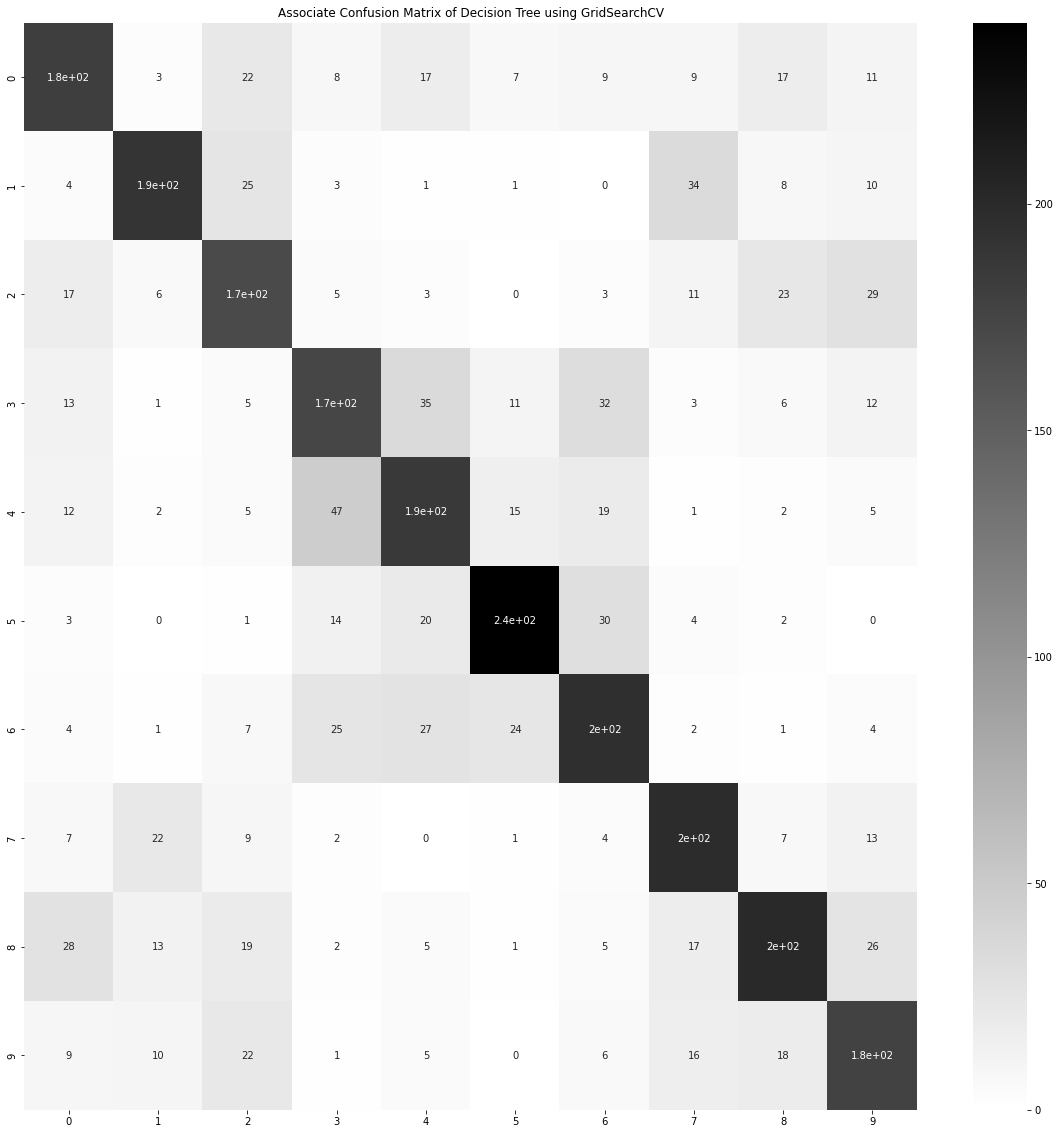

In [80]:
cm_gridSearchCV=metrics.confusion_matrix(Y_test,y_predict)
plt.figure(figsize=(20,20))
plt.title("Associate Confusion Matrix of Decision Tree using GridSearchCV")
sns.heatmap(cm_gridSearchCV,annot=True,cmap='binary')

NOW We are going to see if RandomizedSearchCV gives a good result or not

RANDOMIZED SEARCH CV

In [81]:
from scipy.stats import randint

In [82]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [83]:
tree = DecisionTreeClassifier(random_state=42)

In [84]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [85]:
tree_cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe749acad90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe749acaf90>})

In [86]:
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_leaf=2,
                       random_state=42)

In [87]:
tree_cv.best_score_

0.6313838614905022

In [88]:
dc=DecisionTreeClassifier(criterion='entropy', max_features=5, random_state=42)

In [89]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_features=5, random_state=42)

In [90]:
y_pred_decision_tree=dc.predict(X_test)

In [91]:
y_proba_decision_tree=dc.predict_proba(X_test)

Accuracy Score

In [92]:
print("Accuracy Score for RandomizedSearchCV is :",metrics.accuracy_score(Y_test,y_pred_decision_tree))

Accuracy Score for RandomizedSearchCV is : 0.6391896611945511


R2-Score

In [93]:
print("R2 Score for RandomizedSearchCV is :",metrics.r2_score(Y_test,y_pred_decision_tree))

R2 Score for RandomizedSearchCV is : 0.08420764297699135


Precision Score

In [94]:
print("Precision Score for RandomizedSearchCV is :",metrics.precision_score(Y_test,y_pred_decision_tree,average='micro'))

Precision Score for RandomizedSearchCV is : 0.6391896611945511


Recall Score

In [95]:
print("Recall Score for RandomizedSearchCV is :",metrics.recall_score(Y_test,y_pred_decision_tree,average='micro'))

Recall Score for RandomizedSearchCV is : 0.6391896611945511


F1-Score

In [96]:
print("F1 Score for RandomizedSearchCV is :",metrics.f1_score(Y_test,y_pred_decision_tree,average='micro'))

F1 Score for RandomizedSearchCV is : 0.6391896611945511


ROC-AUC-Score

In [97]:
print("ROC-AUC Score for RandomizedSearchCV is :",metrics.roc_auc_score(Y_test,y_proba_decision_tree,multi_class="ovr"))

ROC-AUC Score for RandomizedSearchCV is : 0.799621414600169


We can draw confusion matrix as well

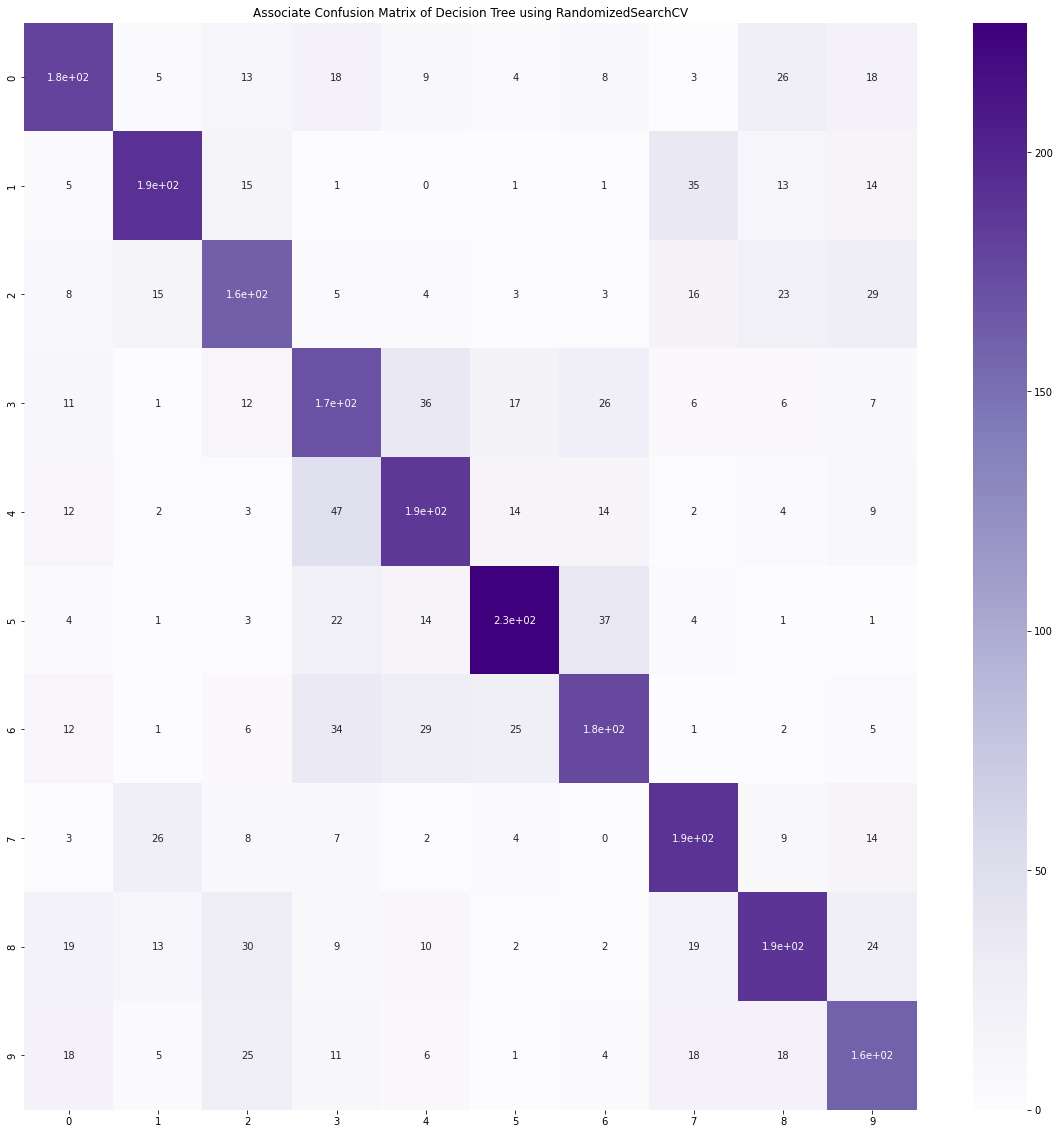

In [98]:
cm_randomized=metrics.confusion_matrix(Y_test,y_pred_decision_tree)
plt.figure(figsize=(20,20))
plt.title("Associate Confusion Matrix of Decision Tree using RandomizedSearchCV")
sns.heatmap(cm_randomized,annot=True,cmap='Purples')

LOGISTIC REGRESSION

In [99]:
logreg=LogisticRegression(C=1,fit_intercept=True,solver='liblinear')

In [100]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1, solver='liblinear')

In [101]:
y_pred_logreg=logreg.predict(X_test)

In [102]:
y_proba_logreg=logreg.predict_proba(X_test)

EVALUATAION METRICS OF LOGISTIC REGRESSION

ACCURACY SCORE

In [103]:
accuracy_logreg=metrics.accuracy_score(Y_test,y_pred_logreg)
accuracy.append(accuracy_logreg)

R2 SCORE

In [104]:
r2_score_logreg=metrics.r2_score(Y_test,y_pred_logreg)
R2_Score.append(r2_score_logreg)

PRECISION SCORE

In [105]:
precision_logreg=metrics.precision_score(Y_test,y_pred_logreg,average='micro')
PRECISION.append(precision_logreg)

RECALL SCORE

In [106]:
recall_logreg=metrics.recall_score(Y_test,y_pred_logreg,average='micro')
RECALL.append(recall_logreg)

F1-SCORE

In [107]:
f1_logreg=metrics.f1_score(Y_test,y_pred_logreg,average='micro')
F1_Score.append(f1_logreg)

ROC-AUC-SCORE

In [108]:
auc_logreg= metrics.roc_auc_score(Y_test,y_proba_logreg, multi_class="ovr")
AUC.append(auc_logreg)

In [109]:
AUC

[0.9851320112862834, 0.8163462197265681, 0.9660733370575733]

Confusion Matrix

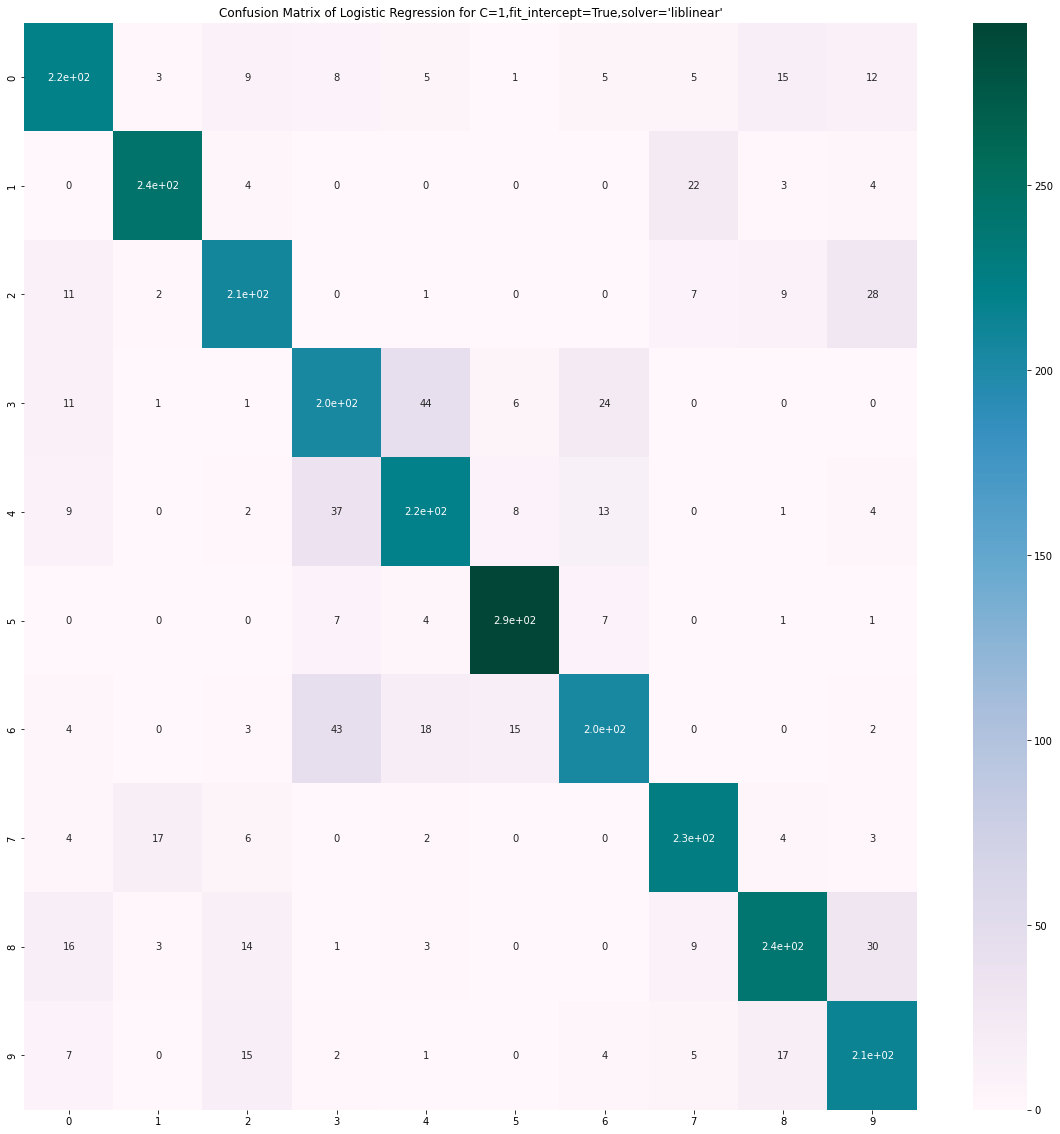

In [110]:
cmat_logreg=metrics.confusion_matrix(Y_test,y_pred_logreg)
plt.figure(figsize=(20,20))
plt.title("Confusion Matrix of Logistic Regression for C=1,fit_intercept=True,solver='liblinear'")
sns.heatmap(cmat_logreg,annot=True,cmap='PuBuGn')

HYPERPARAMETER TUNING (Changing the values of parametrs)

In [111]:
logreg1=LogisticRegression(C=0.1,fit_intercept=True,solver='lbfgs')

In [112]:
logreg1.fit(X_train,Y_train)

LogisticRegression(C=0.1)

In [113]:
y_predict_logreg1=logreg.predict(X_test)

In [114]:
y_pred_proba_logreg1=logreg.predict_proba(X_test)

ACCURACY SCORE

In [115]:
metrics.accuracy_score(Y_test,y_predict_logreg1)

0.7963674467341949

R2 SCORE

In [116]:
metrics.r2_score(Y_test,y_predict_logreg1)

0.5059745698468923

Precision Score

In [117]:
metrics.precision_score(Y_test,y_predict_logreg1,average='micro')

0.7963674467341949

Recall Score

In [118]:
metrics.recall_score(Y_test,y_predict_logreg1,average='micro')

0.7963674467341949

F1-Score

In [119]:
metrics.f1_score(Y_test,y_predict_logreg1,average='micro')

0.7963674467341949

ROC-AUC-SCORE

In [120]:
metrics.roc_auc_score(Y_test,y_pred_proba_logreg1, multi_class="ovr")

0.9660733370575733

Confusion Matrix

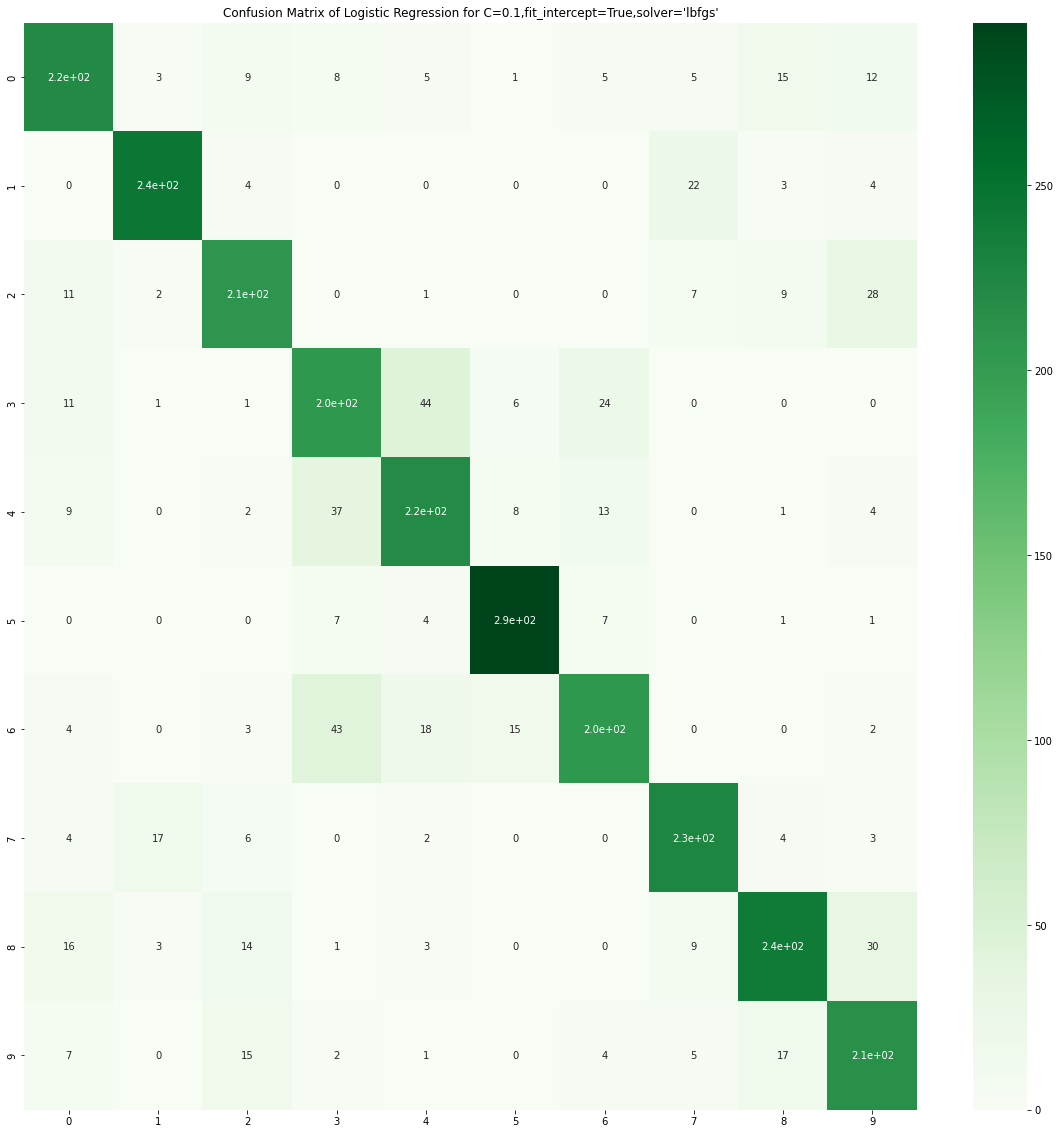

In [121]:
cm_logreg1=metrics.confusion_matrix(Y_test,y_predict_logreg1)
plt.figure(figsize=(20,20))
plt.title("Confusion Matrix of Logistic Regression for C=0.1,fit_intercept=True,solver='lbfgs'")
sns.heatmap(cm_logreg1,annot=True,cmap='Greens')

ANOTHER TRY

In [122]:
logreg2=LogisticRegression(C=0.01,fit_intercept=True,solver='newton-cg')

In [123]:
logreg2.fit(X_train,Y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [124]:
y_pred_logreg2=logreg2.predict(X_test)

In [125]:
y_pred_proba_logreg2=logreg2.predict_proba(X_test)

Accuracy Score

In [126]:
metrics.accuracy_score(Y_test,y_pred_logreg2)

0.7488648271044359

R2-Score

In [127]:
metrics.r2_score(Y_test,y_pred_logreg2)

0.29718461740909563

Precision Score

In [128]:
metrics.precision_score(Y_test,y_pred_logreg2,average='micro')

0.7488648271044359

Recall Score

In [129]:
metrics.recall_score(Y_test,y_pred_logreg2,average='micro')

0.7488648271044359

F1-Score

In [130]:
metrics.f1_score(Y_test,y_pred_logreg2,average='micro')

0.748864827104436

Roc-Auc Score

In [131]:
metrics.roc_auc_score(Y_test,y_pred_proba_logreg2,multi_class="ovr")

0.9604558028504678

Confusion Matrix

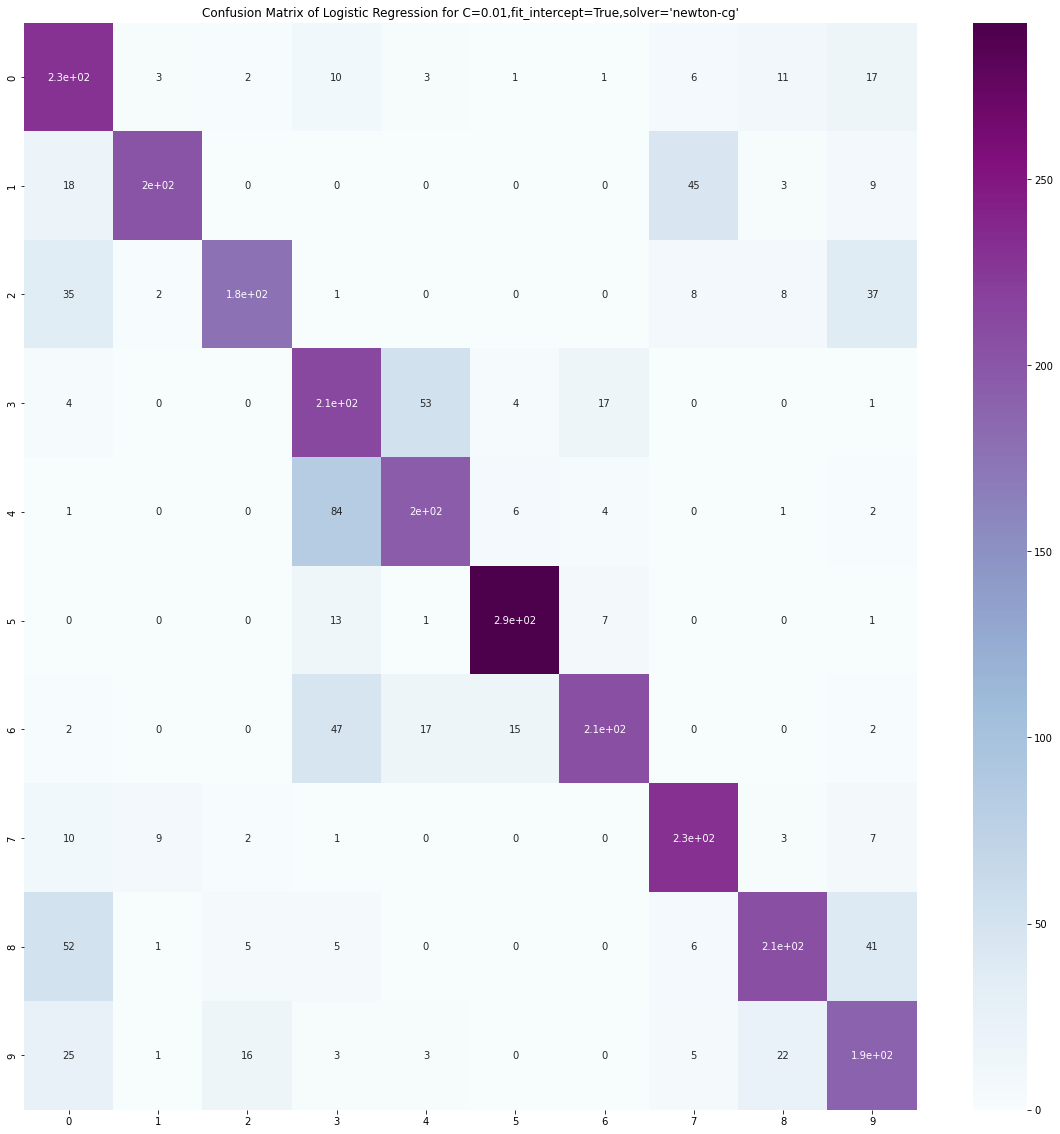

In [132]:
cm_logreg2=metrics.confusion_matrix(Y_test,y_pred_logreg2)
plt.figure(figsize=(20,20))
plt.title("Confusion Matrix of Logistic Regression for C=0.01,fit_intercept=True,solver='newton-cg'")
sns.heatmap(cm_logreg2,annot=True,cmap='BuPu')

Support Vector Machine

In [133]:
sm=svm.SVC(kernel='rbf',C=10,probability=True)

In [134]:
sm.fit(X_train,Y_train)

SVC(C=10, probability=True)

In [135]:
y_sm_pred=sm.predict(X_test)

In [136]:
y_sm_proba=sm.predict_proba(X_test)

EVALUATION MATRICS FOR SVM

Accuracy Score

In [137]:
acc_svm= metrics.accuracy_score(Y_test,y_sm_pred)
accuracy.append(acc_svm)

R2-Score

In [138]:
r2_svm=metrics.r2_score(Y_test,y_sm_pred)
R2_Score.append(r2_svm)

Precision Score

In [139]:
precision_svm= metrics.precision_score(Y_test,y_sm_pred,average='micro')
PRECISION.append(precision_svm)

Recall Score

In [140]:
recall_svm=metrics.recall_score(Y_test,y_sm_pred,average='micro')
RECALL.append(recall_svm)

F1_Score

In [141]:
f1_svm=metrics.f1_score(Y_test,y_sm_pred,average='micro')
F1_Score.append(f1_svm)

ROC-AUC Score

In [142]:
auc_svm=metrics.roc_auc_score(Y_test,y_sm_proba,multi_class="ovr")
AUC.append(auc_svm)

In [143]:
auc_svm

0.9915555998170585

In [144]:
AUC

[0.9851320112862834,
 0.8163462197265681,
 0.9660733370575733,
 0.9915555998170585]

CONFUSION MATRIX

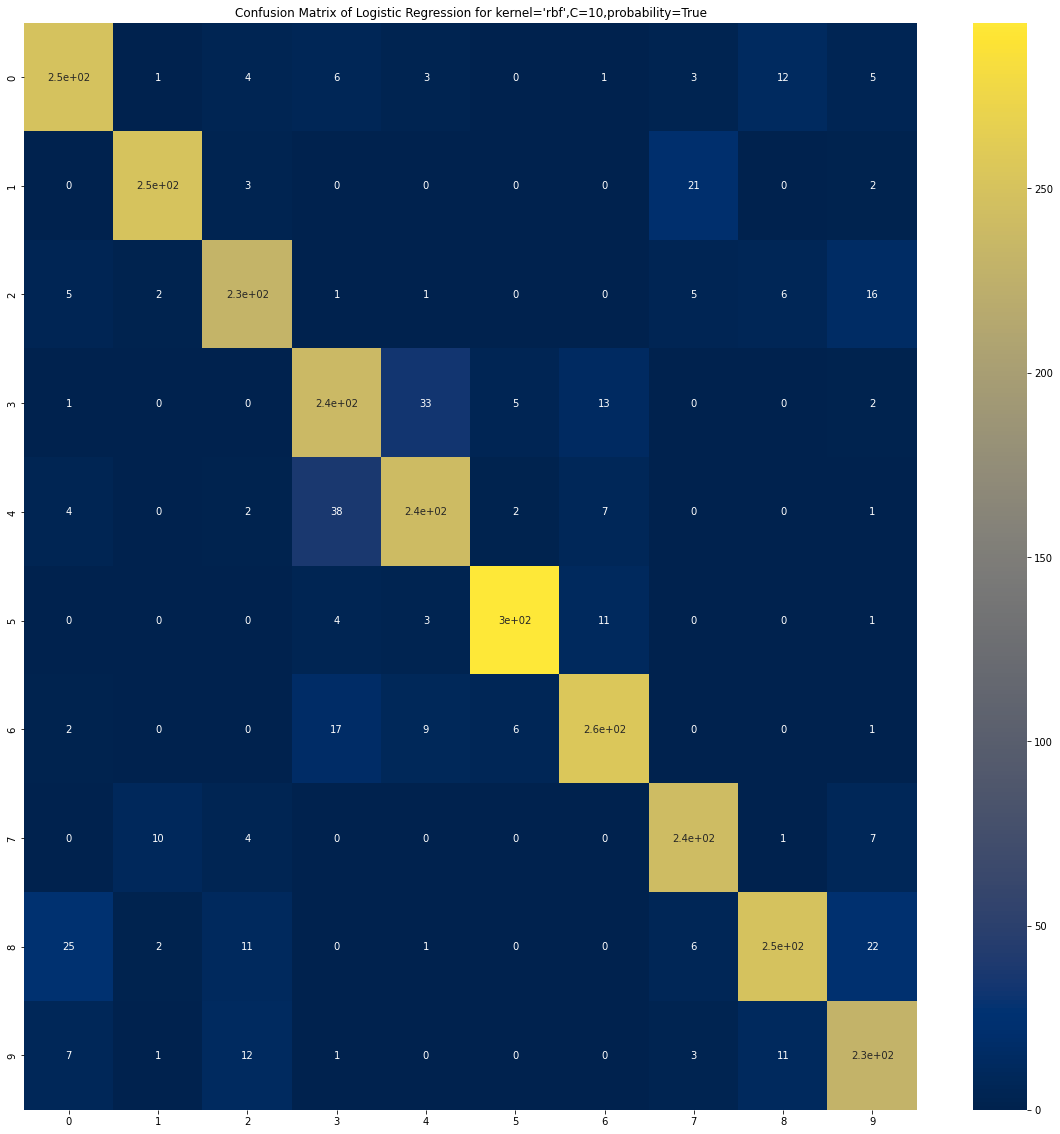

In [145]:
cmat_svm=metrics.confusion_matrix(Y_test,y_sm_pred)
plt.figure(figsize=(20,20))
plt.title("Confusion Matrix of Logistic Regression for kernel='rbf',C=10,probability=True")
sns.heatmap(cmat_svm,annot=True,cmap='cividis')

KNN

In [146]:
KNN=KNeighborsClassifier()
model=KNN.fit(X_train,Y_train)
y_pred_KNN=model.predict(X_test)
y_pred_KNN
y_proba_KNN=model.predict_proba(X_test)

ACCURACY SCORE

In [147]:
acc_knn=metrics.accuracy_score(Y_test,y_pred_KNN)
accuracy.append(acc_knn)

R2-SCORE

In [148]:
r2_knn=metrics.r2_score(Y_test,y_pred_KNN)
R2_Score.append(r2_knn)

PRECISION SCORE

In [149]:
precision_knn=metrics.precision_score(Y_test,y_pred_KNN,average='micro')
PRECISION.append(precision_knn)

RECALL SCORE

In [150]:
recall_knn=metrics.recall_score(Y_test,y_pred_KNN,average='micro')
RECALL.append(recall_knn)

F1_SCORE

In [151]:
f1_knn=metrics.f1_score(Y_test,y_pred_KNN,average='micro')
F1_Score.append(f1_knn)

ROC-AUC-SCORE

In [152]:
auc_knn=metrics.roc_auc_score(Y_test,y_proba_KNN,multi_class="ovr")
AUC.append(auc_knn)

CONFUSION MATRIX FOR KNN

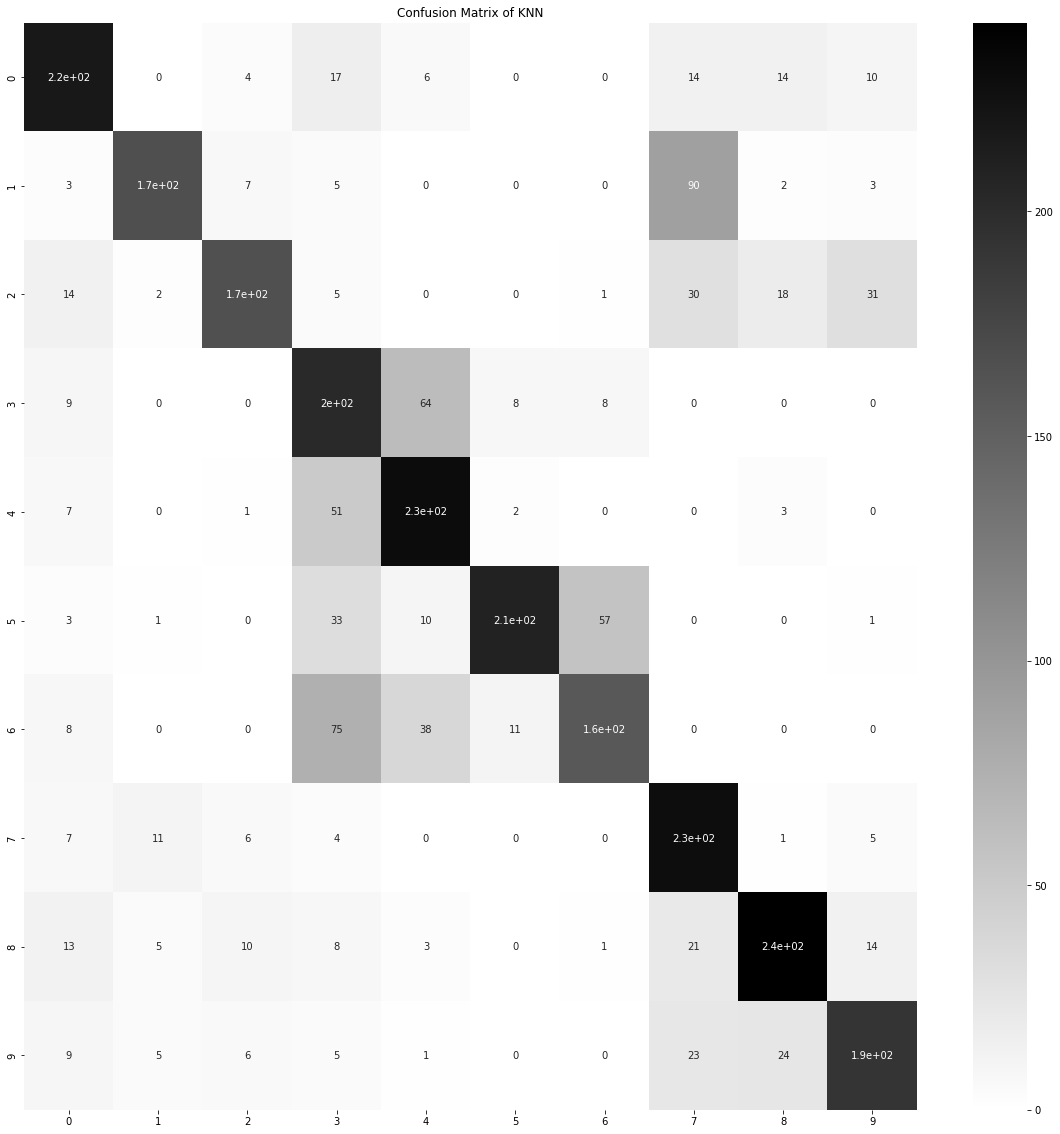

In [153]:
cmat_KNN=metrics.confusion_matrix(Y_test,y_pred_KNN)
plt.figure(figsize=(20,20))
plt.title("Confusion Matrix of KNN")
sns.heatmap(cmat_KNN,annot=True,cmap='gist_yarg')

PLOTTING THE RESULTS

In [154]:
accuracy

[0.8449179182675515,
 0.6695773663988823,
 0.7963674467341949,
 0.8662242403073699,
 0.703807195249738]

In [155]:
R2_Score

[0.6491534559821355,
 0.10315715488937349,
 0.5059745698468923,
 0.647901665901363,
 0.33210524414512566]

In [156]:
PRECISION

[0.8449179182675515,
 0.6695773663988823,
 0.7963674467341949,
 0.8662242403073699,
 0.703807195249738]

In [157]:
RECALL

[0.8449179182675515,
 0.6695773663988823,
 0.7963674467341949,
 0.8662242403073699,
 0.703807195249738]

In [158]:
F1_Score

[0.8449179182675515,
 0.6695773663988823,
 0.7963674467341949,
 0.8662242403073699,
 0.703807195249738]

In [159]:
AUC

[0.9851320112862834,
 0.8163462197265681,
 0.9660733370575733,
 0.9915555998170585,
 0.9240759086410575]

In [160]:
algorithms=['RANDOMFOREST','DecisionTree','Support Vector Machine','Logistic Regression','KNN']
algorithms

['RANDOMFOREST',
 'DecisionTree',
 'Support Vector Machine',
 'Logistic Regression',
 'KNN']

ACCURACY SCORE PLOTTING

In [161]:
accuracy_list=[element * 100 for element in accuracy]
print(accuracy_list)

[84.49179182675515, 66.95773663988824, 79.63674467341949, 86.622424030737, 70.3807195249738]


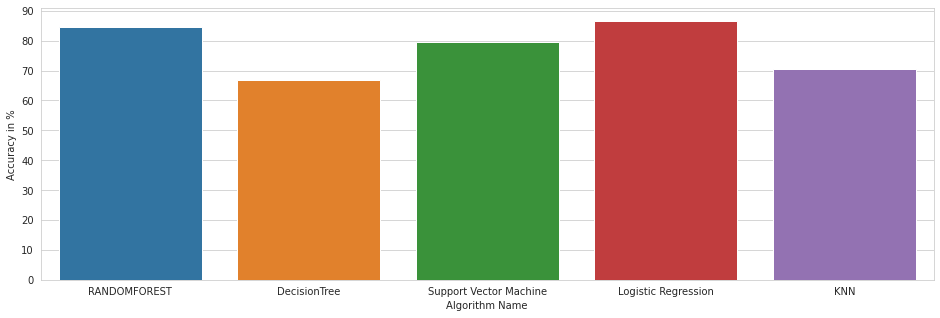

In [162]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=accuracy_list,x=algorithms)
plt.show()

R2-SCORE PLOTTING

In [163]:
r2_list=[element * 100 for element in R2_Score]
print(r2_list)

[64.91534559821355, 10.31571548893735, 50.597456984689224, 64.7901665901363, 33.21052441451256]


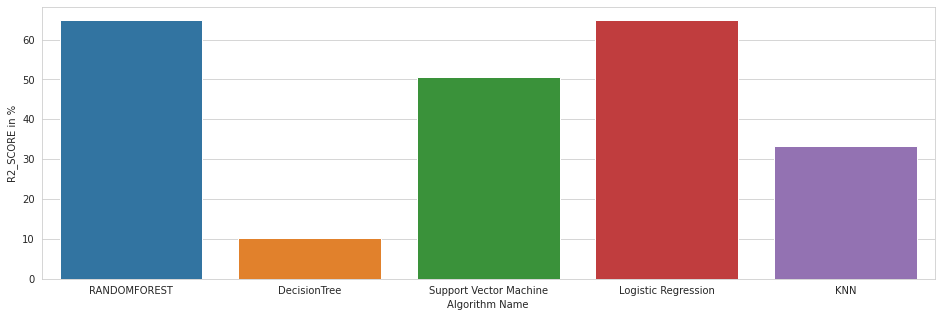

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("R2_SCORE in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=r2_list,x=algorithms)
plt.show()

PRECISON SCORE PLOTTING

In [165]:
p_list=[element * 100 for element in PRECISION]
print(p_list)

[84.49179182675515, 66.95773663988824, 79.63674467341949, 86.622424030737, 70.3807195249738]


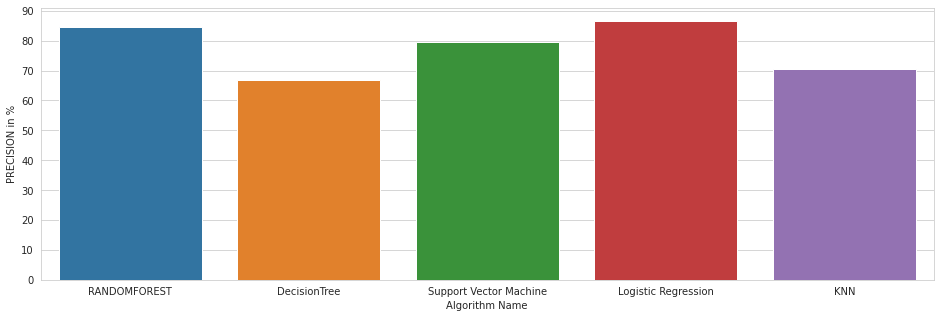

In [166]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("PRECISION in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=p_list,x=algorithms)
plt.show()

RECALL SCORE PLOTTING

In [167]:
recall_list = [element * 100 for element in RECALL]

print(recall_list)

[84.49179182675515, 66.95773663988824, 79.63674467341949, 86.622424030737, 70.3807195249738]


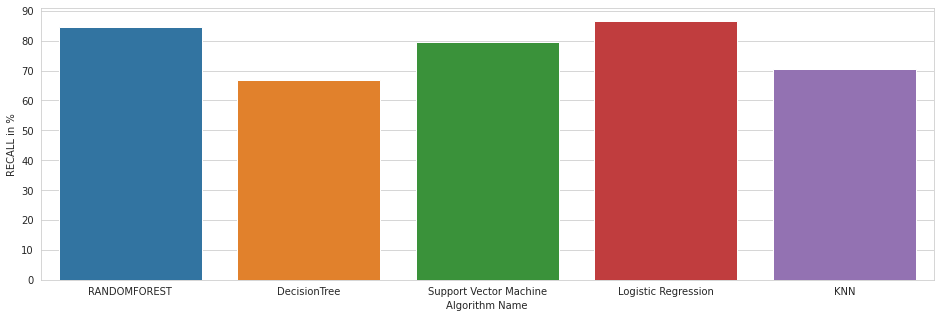

In [168]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("RECALL in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=recall_list,x=algorithms)
plt.show()

F1-SCORE PLOTTING

In [169]:
f1_list=[element * 100 for element in F1_Score]
print(f1_list)

[84.49179182675515, 66.95773663988824, 79.63674467341949, 86.622424030737, 70.3807195249738]


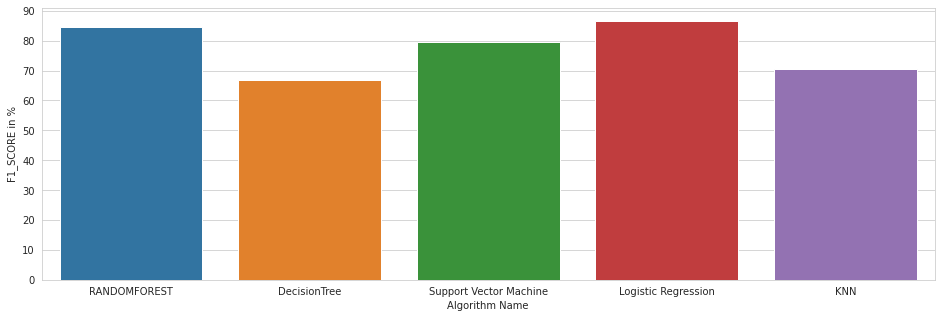

In [170]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("F1_SCORE in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=f1_list,x=algorithms)
plt.show()

ROC-AUC-SCORE PLOTTING

In [171]:
auc_list=[element * 100 for element in AUC]
print(auc_list)

[98.51320112862834, 81.6346219726568, 96.60733370575733, 99.15555998170585, 92.40759086410574]


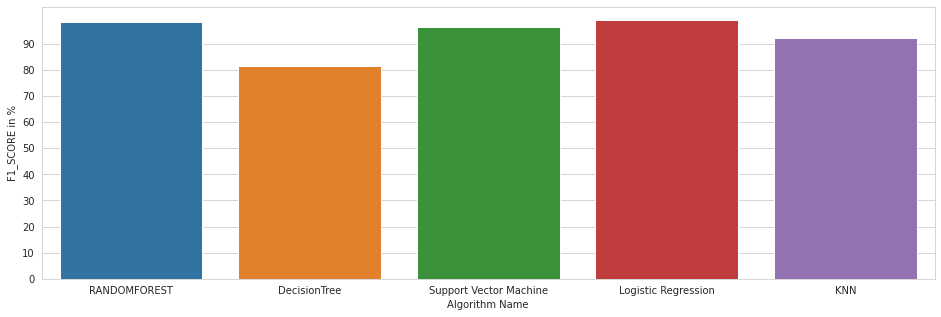

In [172]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("F1_SCORE in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=auc_list,x=algorithms)
plt.show()

THE ROC-AUC CURVE

FOR RANDOM FOREST CLASSIFIER

In [173]:
y_test_binarized=label_binarize(Y_test,classes=np.unique(Y_test))

In [174]:
classes=label_encoder.classes_

In [175]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

In [176]:
n_class

10

In [177]:
Y_pred_proba.shape

(2863, 10)

In [178]:
Y_pred.shape

(2863,)

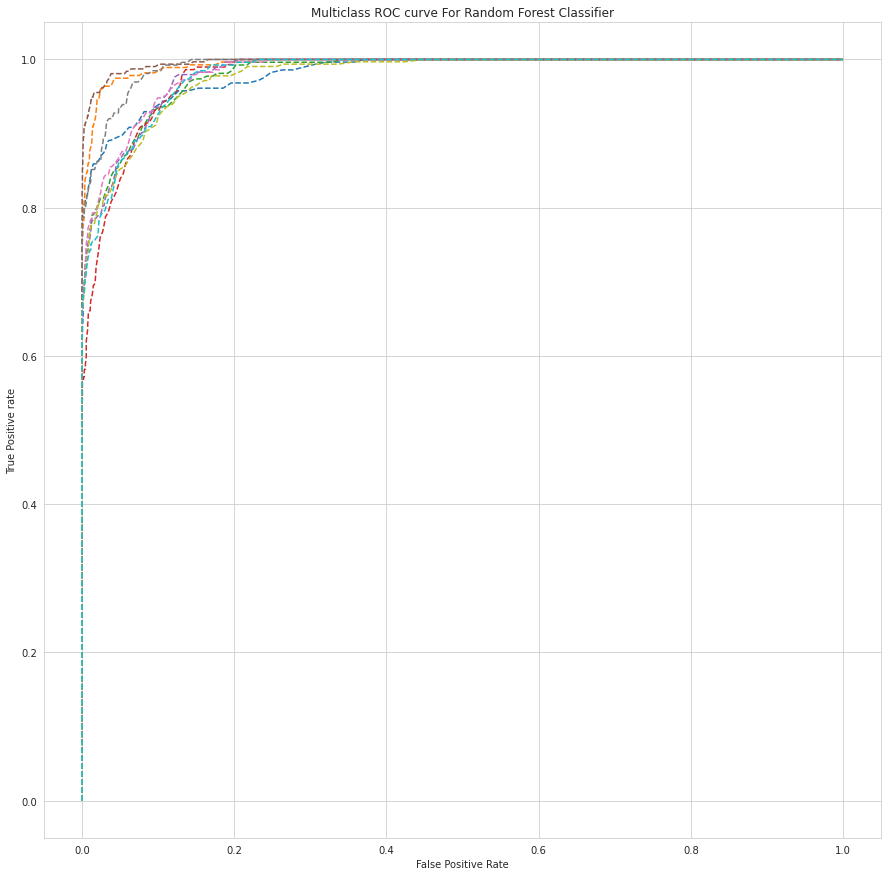

In [179]:
plt.figure(figsize=(15,15))
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], Y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.title('Multiclass ROC curve For Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.show()

DECISION TREE ROC-AUC CURVE

In [180]:
y_test_binarized_dt=label_binarize(Y_test,classes=np.unique(Y_test))

In [181]:
fpr_dt = {}
tpr_dt = {}
thresh_dt ={}
roc_auc_dt = dict()

n_class_dt = classes.shape[0]

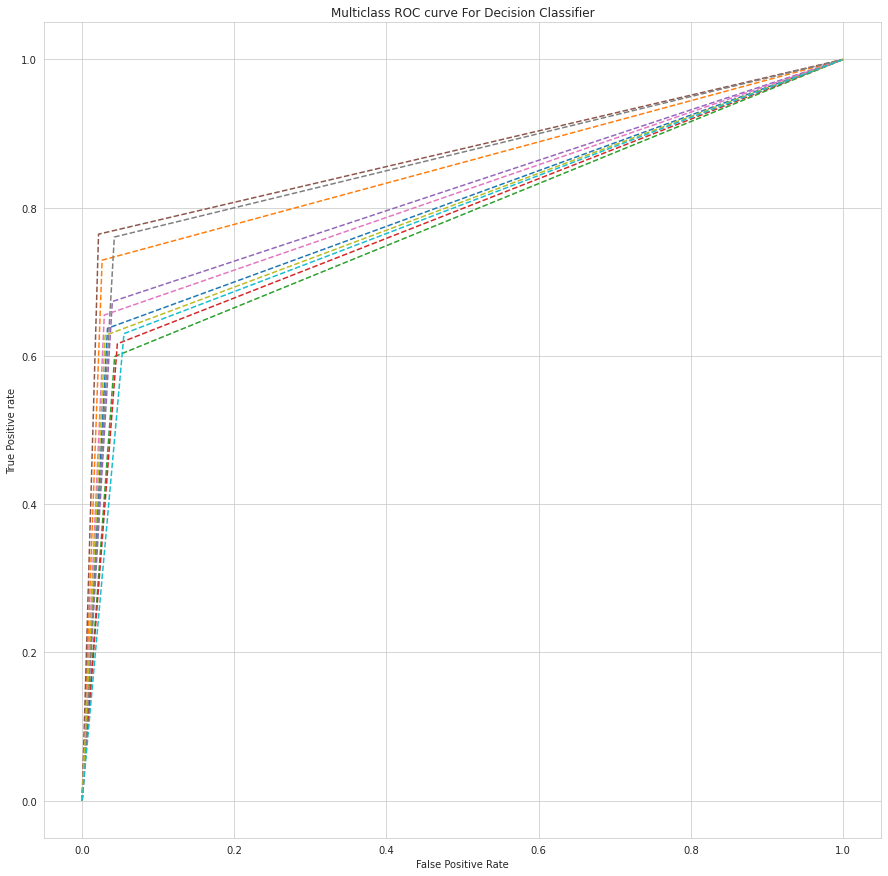

In [182]:
plt.figure(figsize=(15,15))
for i in range(n_class_dt):    
    fpr_dt[i], tpr_dt[i], thresh_dt[i] = roc_curve(y_test_binarized_dt[:,i], y_pred_proba_dt[:,i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])
    
    # plotting    
    plt.plot(fpr_dt[i], tpr_dt[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc_dt[i]))

plt.title('Multiclass ROC curve For Decision Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.show()